# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import json
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from wordcloud import WordCloud , STOPWORDS
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer

!pip install ekphrasis
!pip install tweet-preprocessor
import preprocessor as p

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
     |████████████████████████████████| 80 kB 965 kB/s 
     |████████████████████████████████| 179 kB 3.7 MB/s 
     |████████████████████████████████| 66 kB 1.9 MB/s 
  Created wheel for ekphrasis: filename=ekphrasis-0.5.1-py3-none-any.whl size=82843 sha256=de925aeab9317f1c385cb2c7fafaaa3244791be33f5a4b1f2468331afea97817
  Stored in directory: /root/.cache/pip/wheels/f7/ec/0d/12659e32faf780546945d0120f2c8410eb3efb7426731da88f
  Created wheel for ftfy: filename=ftfy-5.9-py3-none-any.whl size=46451 sha256=12292d830cd313428cc1fdd2638ec5ec0b06eba8a505003cb224e1175c2cdebf
  Stored in directory: /root/.cache/pip/wheels/4f/6b/a5/84880e9435707659c6b96d3aadeb9a87a41f61ec9ede469f41
Successfully built ekphrasis ftfy


# Dataset Import

In [2]:
df = pd.read_csv("../input/suicide-data/twitter-suicidal_data.csv")
df

,tweet,intention
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1
...,...,...
9114,have you ever laid on your bed at night and cr...,1
9115,the fault the blame the pain s still there i m...,1
9116,stop asking me to trust you when i m still cou...,1
9117,i never know how to handle sadness crying make...,1


In [3]:
df.rename(columns={'tweet':'text','intention':'label'}, inplace = True )
df.dropna(inplace = True)
df

,text,label
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1
...,...,...
9114,have you ever laid on your bed at night and cr...,1
9115,the fault the blame the pain s still there i m...,1
9116,stop asking me to trust you when i m still cou...,1
9117,i never know how to handle sadness crying make...,1


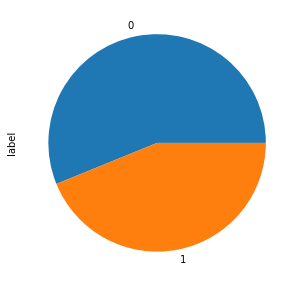

In [4]:
plt.figure(figsize=(10,5))
df['label'].value_counts().plot(kind='pie',x='text',y='label')
plt.show()

In [5]:
df["label"].value_counts()

0    5121
1    3998
Name: label, dtype: int64

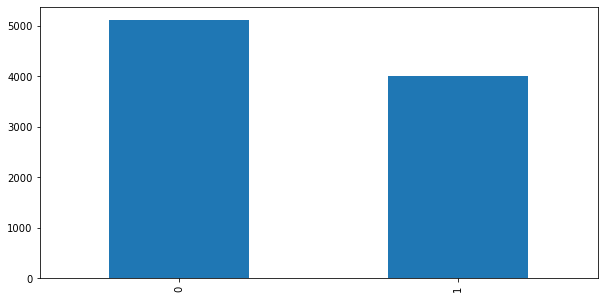

In [6]:
plt.figure(figsize=(10,5))
df['label'].value_counts().plot(kind='bar',x='text',y='label')
plt.show()

# Genetaring Word Cloud

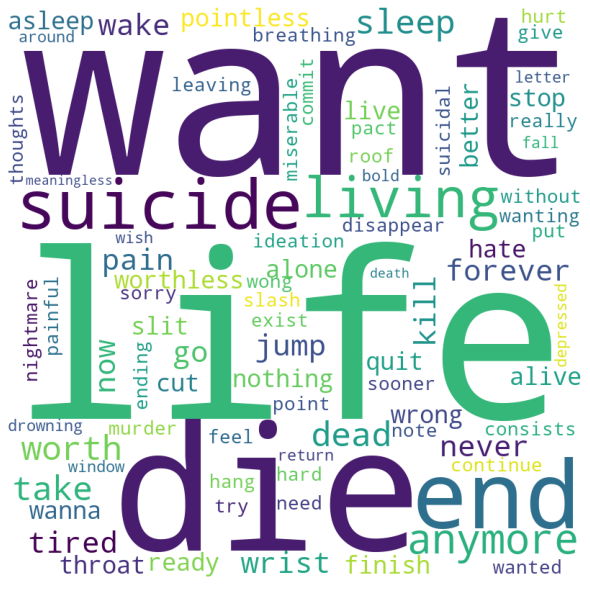

In [7]:
from wordcloud import WordCloud , STOPWORDS

suicide_array = pd.read_csv('../input/suicide-data/suicide keywords.csv')
suicide_array = suicide_array.sample(frac = 1)

suicidal_words = ""

for val in suicide_array.keywords:
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    suicidal_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width=800, height= 800, background_color= 'white', min_font_size= 10).generate(suicidal_words)
plt.figure(figsize=(8,8), facecolor= None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [8]:
evaluation = pd.DataFrame({'Model': [],
                           'Accuracy(train)':[],
                           'Precision(train)':[],
                           'Recall(train)':[],
                           'F1_score(train)':[],
                           'Accuracy(test)':[],
                           'Precision(test)':[],
                           'Recalll(test)':[],
                           'F1_score(test)':[]})

# Preprocessing

In [9]:
def preprocess_data(data):
    #Text-Cleaning (URLs, Mentions, etc.)
    for i,v in enumerate(data):
        data.loc[i] = p.clean(v)
    
    #Remove Digits and lower the text
    data = data.astype(str).str.replace('\d+', '')
    lower_text = data.str.lower()

    #Lemmatization + Tokenization
    lemmatizer = nltk.stem.WordNetLemmatizer()
    w_tokenizer = TweetTokenizer()
    def lemmatize_text(text):
        return [(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize(text)]
    
    #Remove Punctuations
    def remove_punctuation(words):
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', (word))
            if new_word != '':
                new_words.append(new_word)
        return new_words

    words = lower_text.apply(lemmatize_text)
    words = words.apply(remove_punctuation)
    
    #Remove Stop words
    stop_words = set(stopwords.words('english'))
    words = words.apply(lambda x: [item for item in x if item not in stop_words])
    
    #convert list to string for verctorization fit
    for i,v in enumerate(words):
        words.loc[i] = " ".join(v)
        
    return pd.DataFrame(words)

In [10]:
df['text'] = preprocess_data(df['text'])

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


# Vectorization

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2000)
X = cv.fit_transform(df["text"]).toarray()
X.reshape(-1,1)
y = df.iloc[:, 1].values
print(X.shape)
print(y.shape)

(9119, 2000)
(9119,)


## Modeling


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, stratify=y)

# Decision Tree Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 10, random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [15]:
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round()))
print("Recall:",recall_score(y_test, y_pred.round()))
print("F1 Score:",f1_score(y_test, y_pred.round()))

Accuracy: 0.8541666666666666
Precision: 0.9348534201954397
Recall: 0.7175
F1 Score: 0.8118811881188118


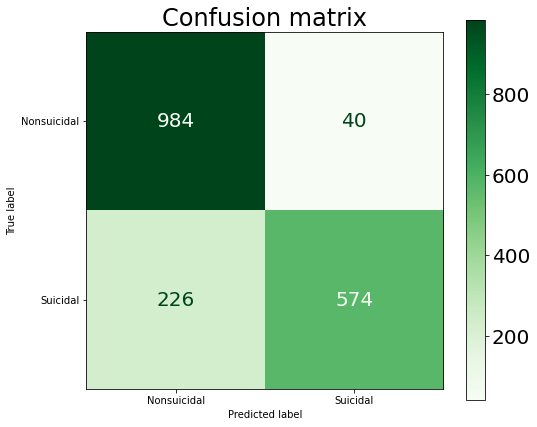

In [16]:
labels = ['Nonsuicidal', 'Suicidal']
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
# plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

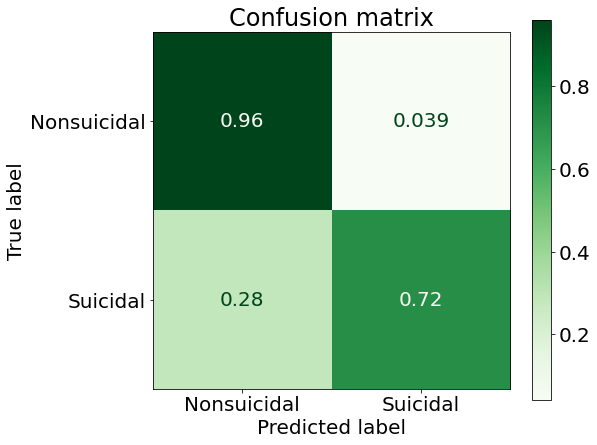

In [17]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
# plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

In [18]:
!pip install --upgrade pip
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
import cv2 as cv
from random import shuffle
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
import tensorflow_addons as tfa
import tensorflow as tf
%matplotlib inline 
import numpy as np
import pandas as pd
import os
import glob
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
!pip install catboost
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
!pip install scikit-plot
import scikitplot as skplt
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
# from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

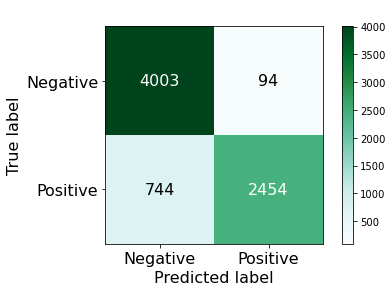

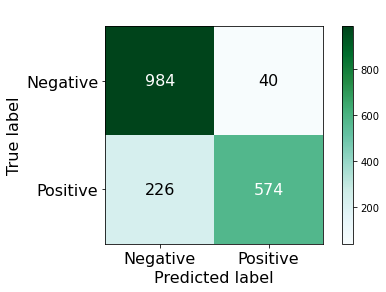

In [19]:
!pip install scikit-plot
import scikitplot as skplt

p=y_train
q=y_test

y_train = pd.DataFrame(y_train)
y_train=y_train.replace([0,1], ["Negative","Positive"])

pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)
pred_train=pred_train.replace([0,1], ["Negative","Positive"])


pred_test=clf.predict(X_test)
y_score = pred_test
y_test = pd.DataFrame(y_test)
y_test=y_test.replace([0,1], ["Negative","Positive"])
pred_test=pd.DataFrame(pred_test)

pred_test=pred_test.replace([0,1], ["Negative","Positive"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )
y_train=p
y_test=q

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


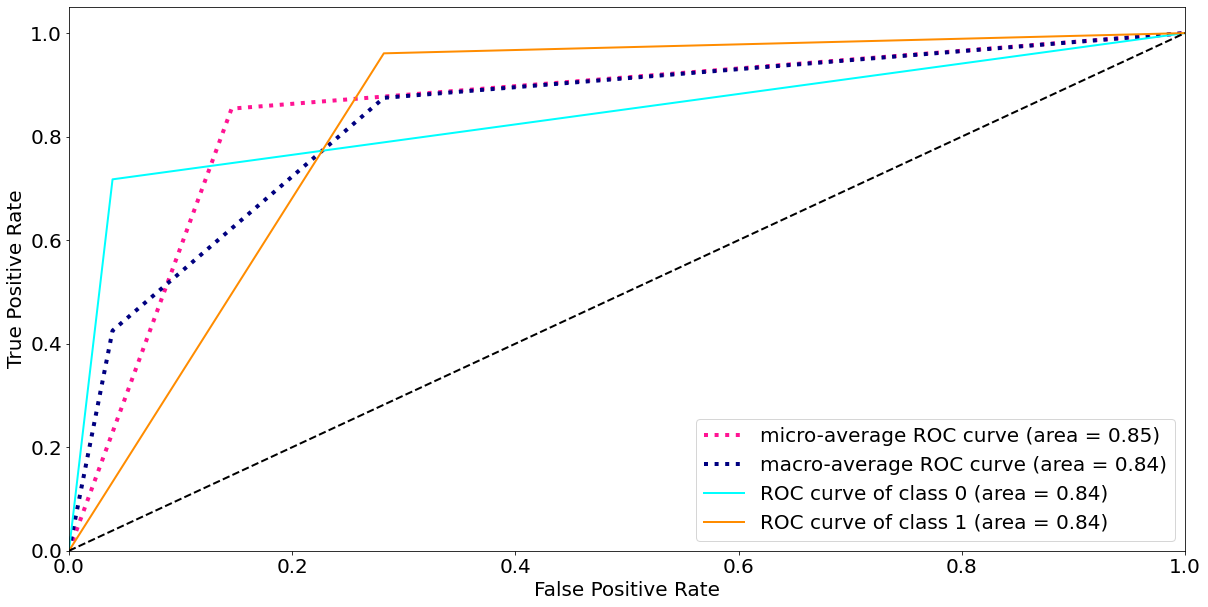

In [20]:
n_classes = 2
roc_y_test = [None] * len(y_test);    
for i in range(0, len(y_test)):    
    roc_y_test[i] = y_test[i]; 
    
y_score[50]=2
roc_y_test[50]=2
y_test
from sklearn.preprocessing import label_binarize
y_score = label_binarize(y_score, classes=[1, 0])
roc_y_test = label_binarize(roc_y_test, classes=[1, 0])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(roc_y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [21]:
acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Decision Tree Classifier',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
0,Decision Tree Classifier,0.885,0.903,0.872,0.88,0.854,0.874,0.839,0.846


# Naive Bayes Classifier

In [22]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [23]:
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round()))
print("Recall:",recall_score(y_test, y_pred.round()))
print("F1 Score:",f1_score(y_test, y_pred.round()))

Accuracy: 0.8601973684210527
Precision: 0.8800557880055788
Recall: 0.78875
F1 Score: 0.8319050758075147


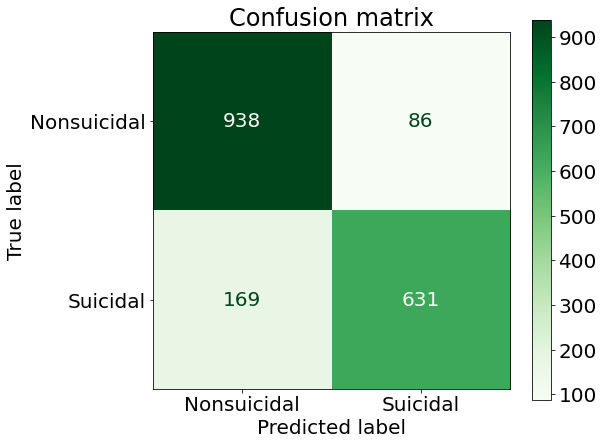

In [24]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
plot_confusion_matrix(gnb, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
# plot_confusion_matrix(gnb, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

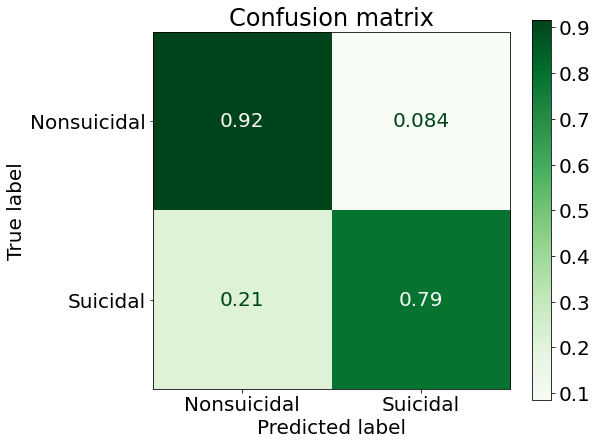

In [25]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
# plot_confusion_matrix(gnb, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
plot_confusion_matrix(gnb, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

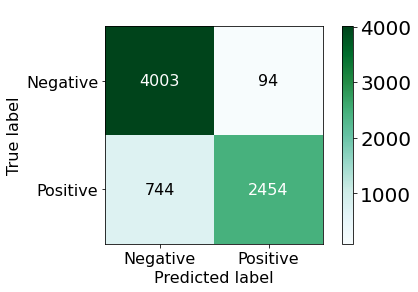

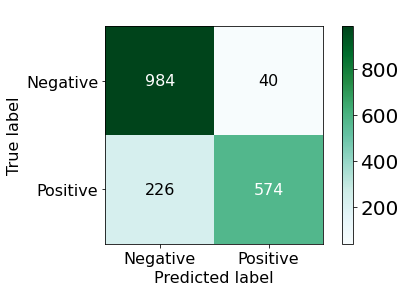

In [26]:
# !pip install scikit-plot
import scikitplot as skplt

p=y_train
q=y_test

y_train = pd.DataFrame(y_train)
y_train=y_train.replace([0,1], ["Negative","Positive"])

pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)
pred_train=pred_train.replace([0,1], ["Negative","Positive"])


pred_test=clf.predict(X_test)
y_score = pred_test
y_test = pd.DataFrame(y_test)
y_test=y_test.replace([0,1], ["Negative","Positive"])
pred_test=pd.DataFrame(pred_test)

pred_test=pred_test.replace([0,1], ["Negative","Positive"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )
y_train=p
y_test=q

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


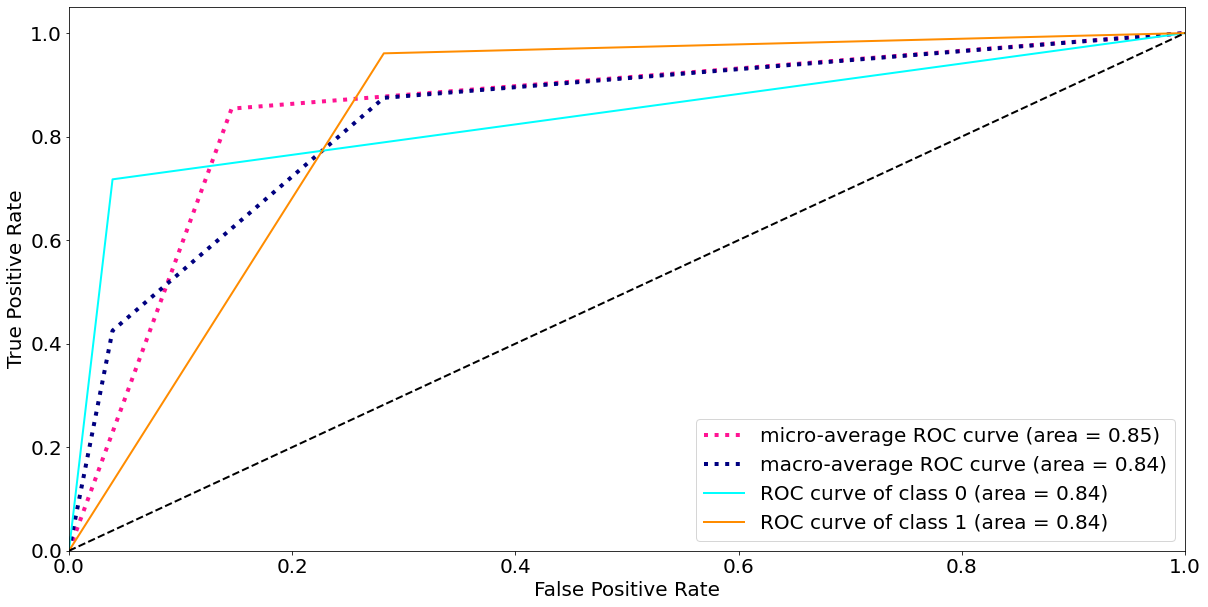

In [27]:
n_classes = 2
roc_y_test = [None] * len(y_test);    
for i in range(0, len(y_test)):    
    roc_y_test[i] = y_test[i]; 
    
y_score[50]=2
roc_y_test[50]=2
y_test
from sklearn.preprocessing import label_binarize
y_score = label_binarize(y_score, classes=[1, 0])
roc_y_test = label_binarize(roc_y_test, classes=[1, 0])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(roc_y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [28]:
acc_train=format(accuracy_score(gnb.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, gnb.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,gnb.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,gnb.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(gnb.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, gnb.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,gnb.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,gnb.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Naive Bayes Classifier',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
1,Naive Bayes Classifier,0.898,0.916,0.885,0.893,0.860,0.864,0.852,0.856
0,Decision Tree Classifier,0.885,0.903,0.872,0.880,0.854,0.874,0.839,0.846


# Support Vector machines

In [29]:
#Import svm model
from sklearn import svm

# Import Support Vector Classifier
from sklearn.svm import SVC

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [30]:
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round()))
print("Recall:",recall_score(y_test, y_pred.round()))
print("F1 Score:",f1_score(y_test, y_pred.round()))

Accuracy: 0.8848684210526315
Precision: 0.9085872576177285
Recall: 0.82
F1 Score: 0.862023653088042


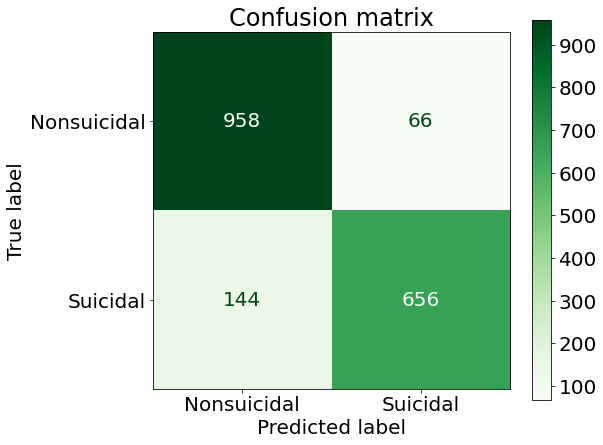

In [31]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
# plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

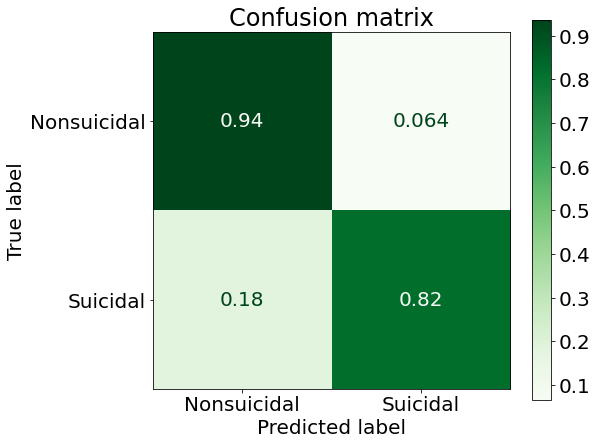

In [32]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
# plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

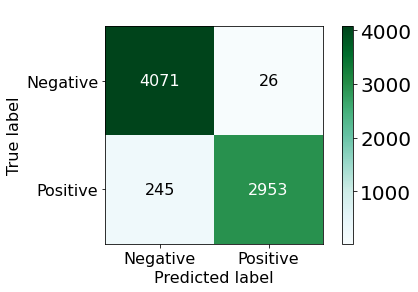

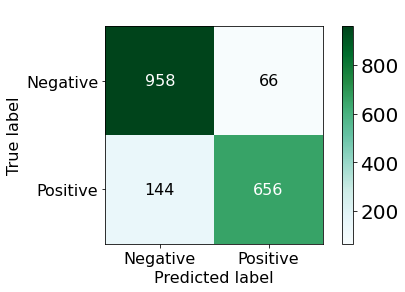

In [33]:
# !pip install scikit-plot
import scikitplot as skplt

p=y_train
q=y_test

y_train = pd.DataFrame(y_train)
y_train=y_train.replace([0,1], ["Negative","Positive"])

pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)
pred_train=pred_train.replace([0,1], ["Negative","Positive"])


pred_test=clf.predict(X_test)
y_score = pred_test
y_test = pd.DataFrame(y_test)
y_test=y_test.replace([0,1], ["Negative","Positive"])
pred_test=pd.DataFrame(pred_test)

pred_test=pred_test.replace([0,1], ["Negative","Positive"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )
y_train=p
y_test=q

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


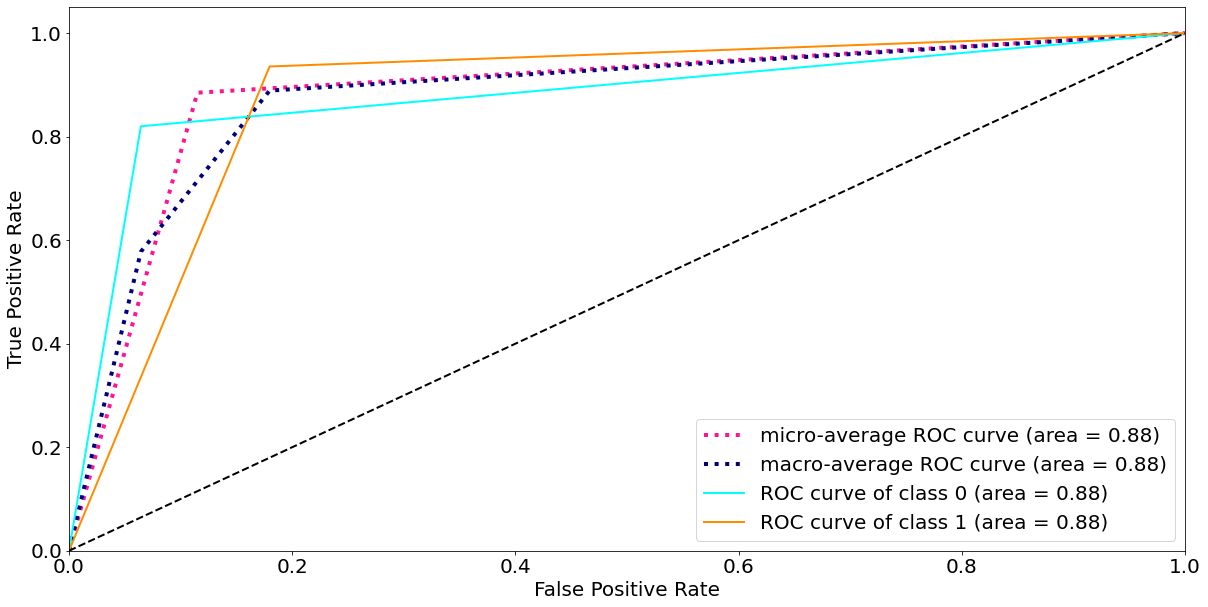

In [34]:
n_classes = 2
roc_y_test = [None] * len(y_test);    
for i in range(0, len(y_test)):    
    roc_y_test[i] = y_test[i]; 
    
y_score[50]=2
roc_y_test[50]=2
y_test
from sklearn.preprocessing import label_binarize
y_score = label_binarize(y_score, classes=[1, 0])
roc_y_test = label_binarize(roc_y_test, classes=[1, 0])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(roc_y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [35]:
acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Support Vector Machines',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
2,Support Vector Machines,0.963,0.967,0.959,0.962,0.885,0.889,0.878,0.882
1,Naive Bayes Classifier,0.898,0.916,0.885,0.893,0.860,0.864,0.852,0.856
0,Decision Tree Classifier,0.885,0.903,0.872,0.880,0.854,0.874,0.839,0.846


# Random Forest Classifier

In [36]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, random_state = 0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [37]:
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round()))
print("Recall:",recall_score(y_test, y_pred.round()))
print("F1 Score:",f1_score(y_test, y_pred.round()))

Accuracy: 0.8919956140350878
Precision: 0.8920676202860858
Recall: 0.8575
F1 Score: 0.8744423199490121


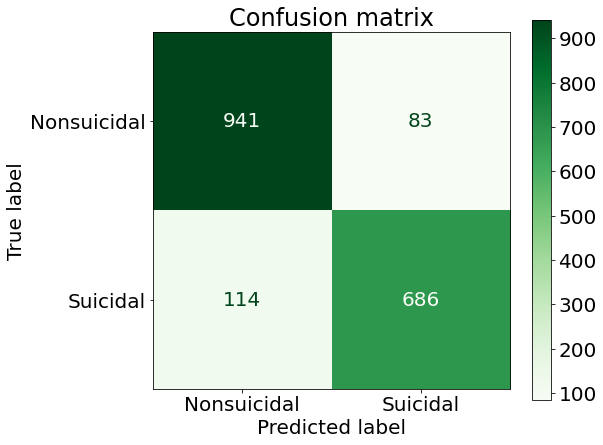

In [38]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
# plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

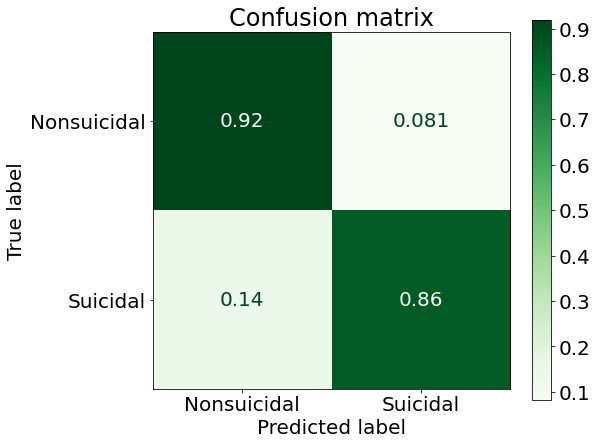

In [39]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
# plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

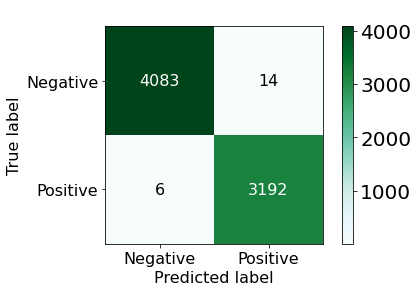

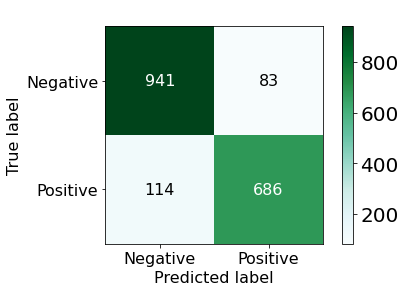

In [40]:
# !pip install scikit-plot
import scikitplot as skplt

p=y_train
q=y_test

y_train = pd.DataFrame(y_train)
y_train=y_train.replace([0,1], ["Negative","Positive"])

pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)
pred_train=pred_train.replace([0,1], ["Negative","Positive"])


pred_test=clf.predict(X_test)
y_score = pred_test
y_test = pd.DataFrame(y_test)
y_test=y_test.replace([0,1], ["Negative","Positive"])
pred_test=pd.DataFrame(pred_test)

pred_test=pred_test.replace([0,1], ["Negative","Positive"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )
y_train=p
y_test=q

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


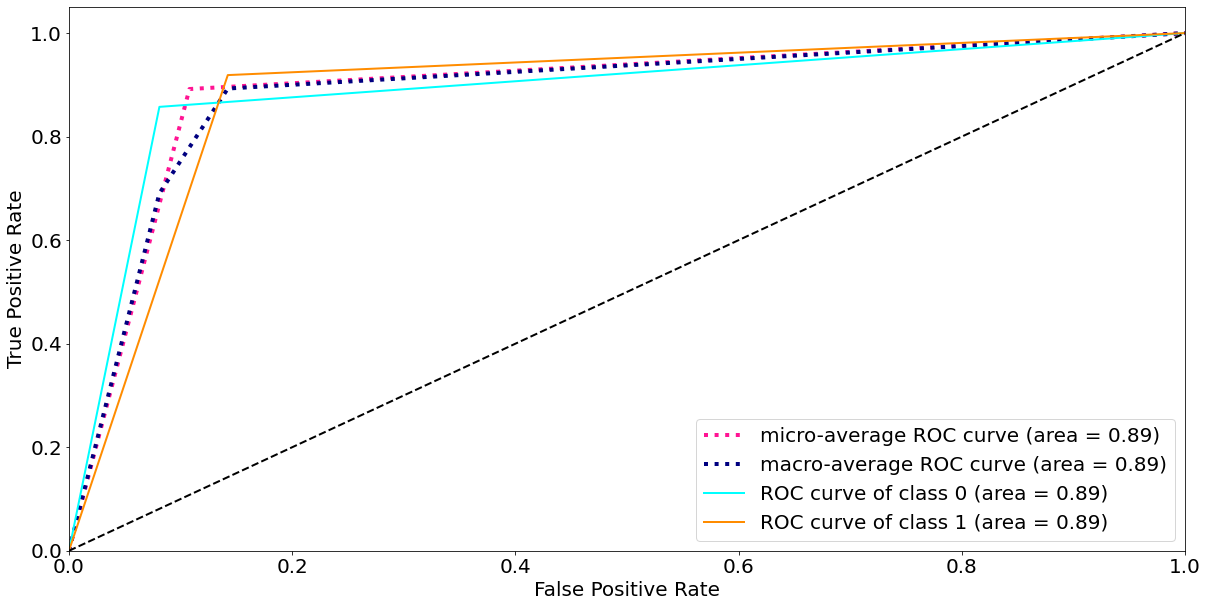

In [41]:
n_classes = 2
roc_y_test = [None] * len(y_test);    
for i in range(0, len(y_test)):    
    roc_y_test[i] = y_test[i]; 
    
y_score[50]=2
roc_y_test[50]=2
y_test
from sklearn.preprocessing import label_binarize
y_score = label_binarize(y_score, classes=[1, 0])
roc_y_test = label_binarize(roc_y_test, classes=[1, 0])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(roc_y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [42]:
acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Random Forest Classifier',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
3,Random Forest Classifier,0.997,0.997,0.997,0.997,0.892,0.892,0.888,0.890
2,Support Vector Machines,0.963,0.967,0.959,0.962,0.885,0.889,0.878,0.882
1,Naive Bayes Classifier,0.898,0.916,0.885,0.893,0.860,0.864,0.852,0.856
0,Decision Tree Classifier,0.885,0.903,0.872,0.880,0.854,0.874,0.839,0.846


# CatBoost Classifier

In [43]:
# !pip install catboost
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=1000, 
    learning_rate=0.1, 
    #verbose=5,
    #loss_function='CrossEntropy'
)

clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

0:	learn: 0.6222715	total: 86.6ms	remaining: 1m 26s
1:	learn: 0.5661693	total: 117ms	remaining: 58.5s
2:	learn: 0.5207735	total: 144ms	remaining: 48s
3:	learn: 0.4881946	total: 171ms	remaining: 42.5s
4:	learn: 0.4610537	total: 197ms	remaining: 39.1s
5:	learn: 0.4418313	total: 223ms	remaining: 36.9s
6:	learn: 0.4265660	total: 254ms	remaining: 36s
7:	learn: 0.4132226	total: 281ms	remaining: 34.9s
8:	learn: 0.4010174	total: 310ms	remaining: 34.1s
9:	learn: 0.3907142	total: 340ms	remaining: 33.6s
10:	learn: 0.3816055	total: 369ms	remaining: 33.2s
11:	learn: 0.3729348	total: 398ms	remaining: 32.7s
12:	learn: 0.3667799	total: 425ms	remaining: 32.3s
13:	learn: 0.3602226	total: 454ms	remaining: 32s
14:	learn: 0.3544872	total: 485ms	remaining: 31.9s
15:	learn: 0.3483512	total: 516ms	remaining: 31.7s
16:	learn: 0.3441353	total: 543ms	remaining: 31.4s
17:	learn: 0.3397276	total: 571ms	remaining: 31.1s
18:	learn: 0.3349657	total: 598ms	remaining: 30.9s
19:	learn: 0.3313694	total: 626ms	remaining: 

In [44]:
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round()))
print("Recall:",recall_score(y_test, y_pred.round()))
print("F1 Score:",f1_score(y_test, y_pred.round()))

Accuracy: 0.9013157894736842
Precision: 0.9329608938547486
Recall: 0.835
F1 Score: 0.8812664907651715


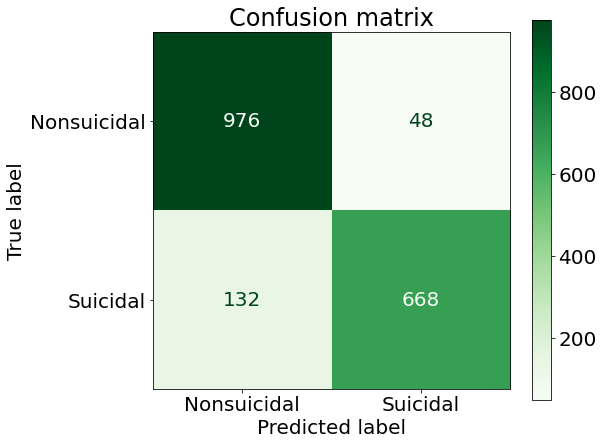

In [45]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
# plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

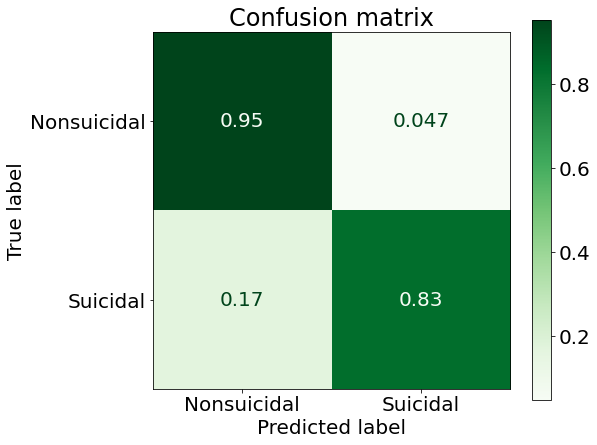

In [46]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
# plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

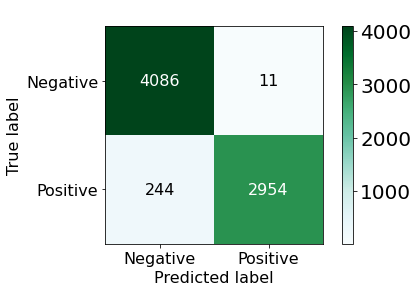

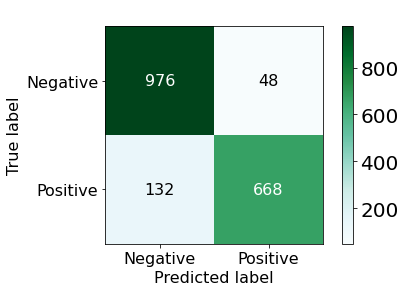

In [47]:
# !pip install scikit-plot
import scikitplot as skplt

p=y_train
q=y_test

y_train = pd.DataFrame(y_train)
y_train=y_train.replace([0,1], ["Negative","Positive"])

pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)
pred_train=pred_train.replace([0,1], ["Negative","Positive"])


pred_test=clf.predict(X_test)
y_score = pred_test
y_test = pd.DataFrame(y_test)
y_test=y_test.replace([0,1], ["Negative","Positive"])
pred_test=pd.DataFrame(pred_test)

pred_test=pred_test.replace([0,1], ["Negative","Positive"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )
y_train=p
y_test=q

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


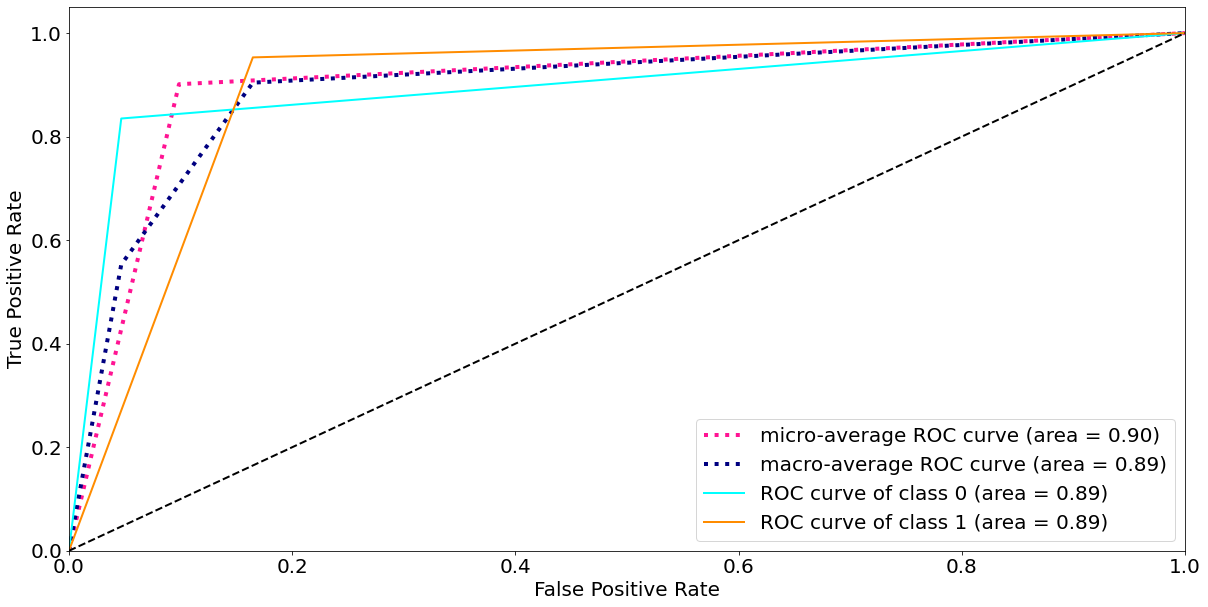

In [48]:
n_classes = 2
roc_y_test = [None] * len(y_test);    
for i in range(0, len(y_test)):    
    roc_y_test[i] = y_test[i]; 
    
y_score[50]=2
roc_y_test[50]=2
y_test
from sklearn.preprocessing import label_binarize
y_score = label_binarize(y_score, classes=[1, 0])
roc_y_test = label_binarize(roc_y_test, classes=[1, 0])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(roc_y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [49]:
acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['CatBoost Classifier',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
4,CatBoost Classifier,0.965,0.970,0.961,0.964,0.901,0.907,0.894,0.898
3,Random Forest Classifier,0.997,0.997,0.997,0.997,0.892,0.892,0.888,0.890
2,Support Vector Machines,0.963,0.967,0.959,0.962,0.885,0.889,0.878,0.882
1,Naive Bayes Classifier,0.898,0.916,0.885,0.893,0.860,0.864,0.852,0.856
0,Decision Tree Classifier,0.885,0.903,0.872,0.880,0.854,0.874,0.839,0.846


# XGBoost Classifier

In [50]:
!pip install xgboost

In [51]:
import xgboost as xgb

clf = xgb.XGBClassifier(random_state=700)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:13:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [52]:
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round()))
print("Recall:",recall_score(y_test, y_pred.round()))
print("F1 Score:",f1_score(y_test, y_pred.round()))

Accuracy: 0.90625
Precision: 0.94109396914446
Recall: 0.83875
F1 Score: 0.8869795109054858


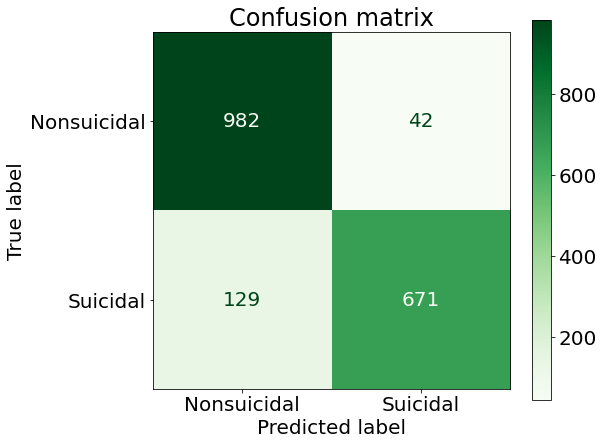

In [53]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
# plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

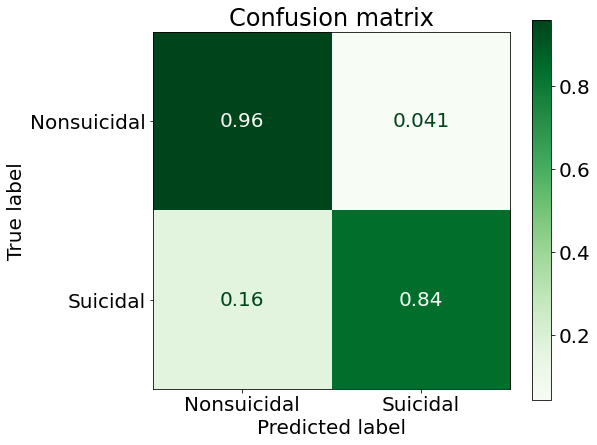

In [54]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
# plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

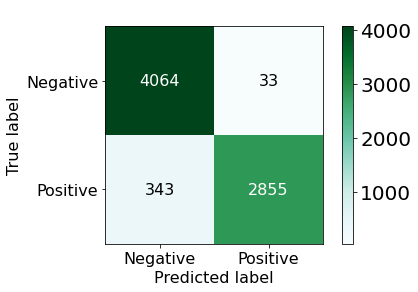

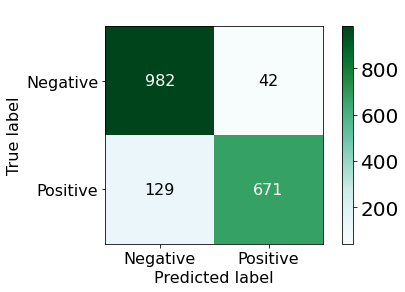

In [55]:
# !pip install scikit-plot
import scikitplot as skplt

p=y_train
q=y_test

y_train = pd.DataFrame(y_train)
y_train=y_train.replace([0,1], ["Negative","Positive"])

pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)
pred_train=pred_train.replace([0,1], ["Negative","Positive"])


pred_test=clf.predict(X_test)
y_score = pred_test
y_test = pd.DataFrame(y_test)
y_test=y_test.replace([0,1], ["Negative","Positive"])
pred_test=pd.DataFrame(pred_test)

pred_test=pred_test.replace([0,1], ["Negative","Positive"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )
y_train=p
y_test=q

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


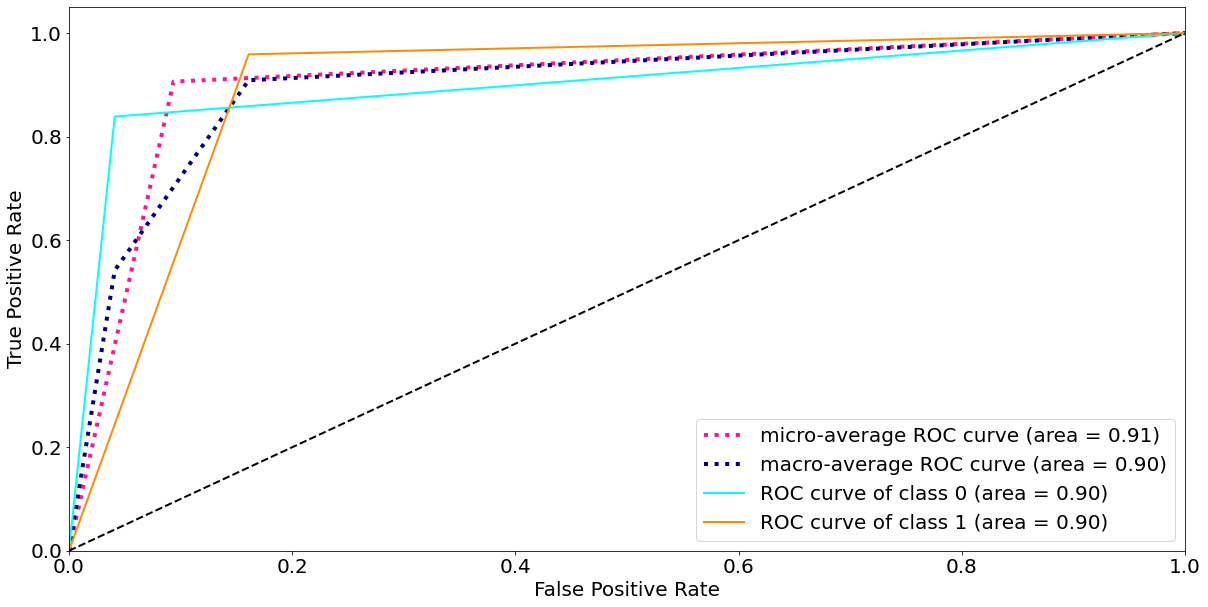

In [56]:
n_classes = 2
roc_y_test = [None] * len(y_test);    
for i in range(0, len(y_test)):    
    roc_y_test[i] = y_test[i]; 
    
y_score[50]=2
roc_y_test[50]=2
y_test
from sklearn.preprocessing import label_binarize
y_score = label_binarize(y_score, classes=[1, 0])
roc_y_test = label_binarize(roc_y_test, classes=[1, 0])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(roc_y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [57]:
acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['XGBoost Classifier',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
5,XGBoost Classifier,0.948,0.955,0.942,0.947,0.906,0.912,0.899,0.903
4,CatBoost Classifier,0.965,0.970,0.961,0.964,0.901,0.907,0.894,0.898
3,Random Forest Classifier,0.997,0.997,0.997,0.997,0.892,0.892,0.888,0.890
2,Support Vector Machines,0.963,0.967,0.959,0.962,0.885,0.889,0.878,0.882
1,Naive Bayes Classifier,0.898,0.916,0.885,0.893,0.860,0.864,0.852,0.856
0,Decision Tree Classifier,0.885,0.903,0.872,0.880,0.854,0.874,0.839,0.846


# Gradient Boosting Classifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=1000, learning_rate=0.1,n_estimators=500)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [59]:
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round()))
print("Recall:",recall_score(y_test, y_pred.round()))
print("F1 Score:",f1_score(y_test, y_pred.round()))

Accuracy: 0.9029605263157895
Precision: 0.9482014388489208
Recall: 0.82375
F1 Score: 0.8816053511705686


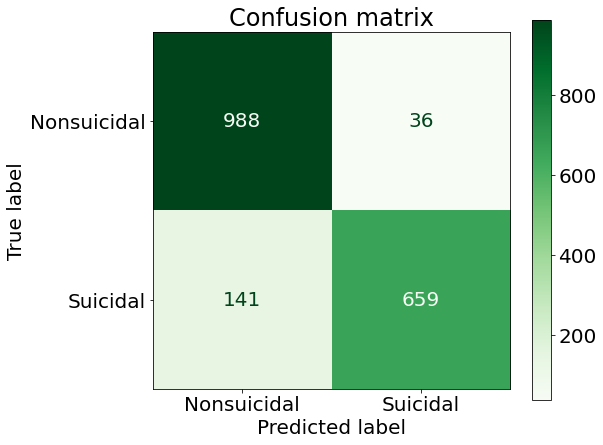

In [60]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
# plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

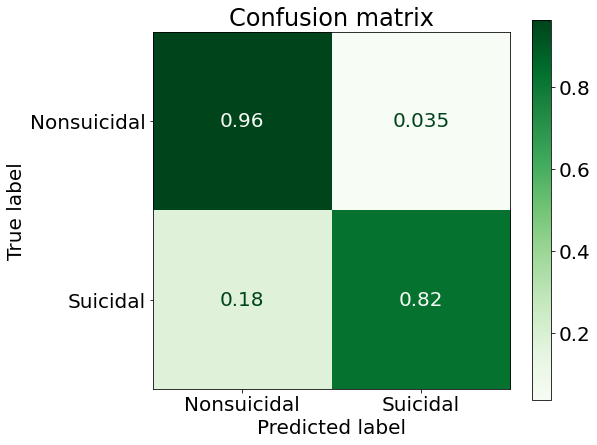

In [61]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
# plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

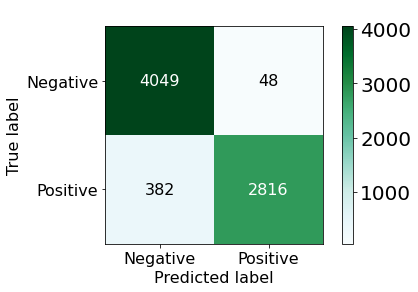

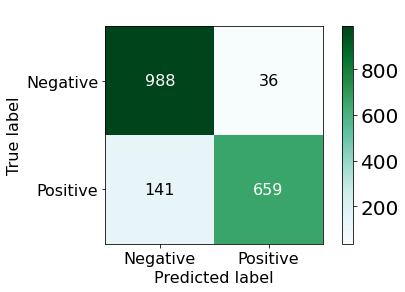

In [62]:
# !pip install scikit-plot
import scikitplot as skplt

p=y_train
q=y_test

y_train = pd.DataFrame(y_train)
y_train=y_train.replace([0,1], ["Negative","Positive"])

pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)
pred_train=pred_train.replace([0,1], ["Negative","Positive"])


pred_test=clf.predict(X_test)
y_score = pred_test
y_test = pd.DataFrame(y_test)
y_test=y_test.replace([0,1], ["Negative","Positive"])
pred_test=pd.DataFrame(pred_test)

pred_test=pred_test.replace([0,1], ["Negative","Positive"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )
y_train=p
y_test=q

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


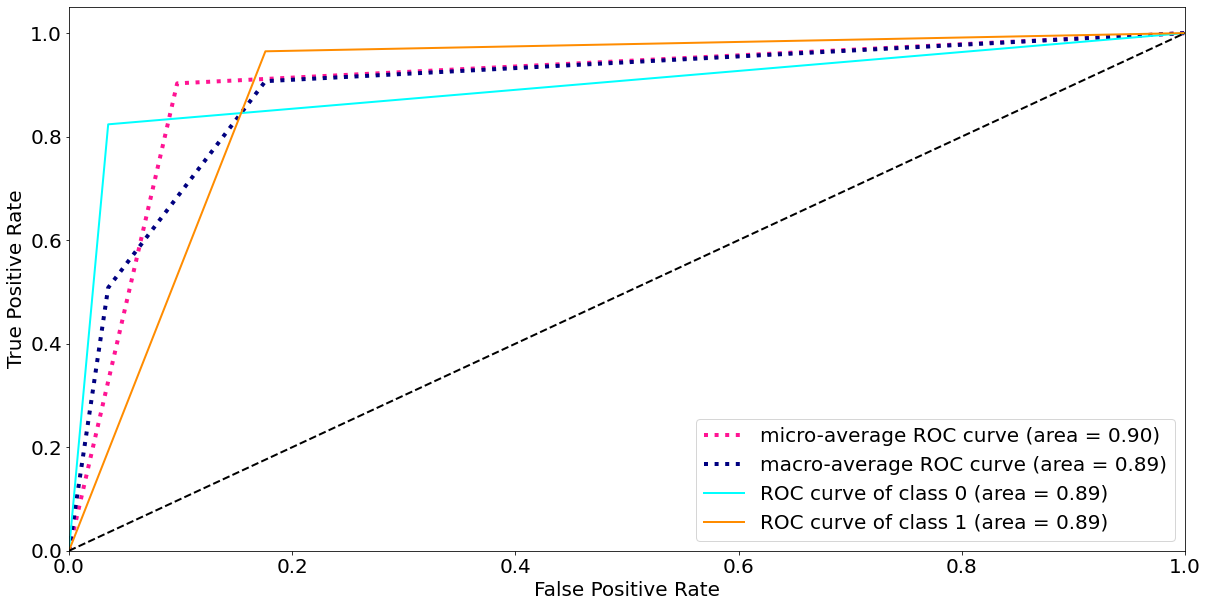

In [63]:
n_classes = 2
roc_y_test = [None] * len(y_test);    
for i in range(0, len(y_test)):    
    roc_y_test[i] = y_test[i]; 
    
y_score[50]=2
roc_y_test[50]=2
y_test
from sklearn.preprocessing import label_binarize
y_score = label_binarize(y_score, classes=[1, 0])
roc_y_test = label_binarize(roc_y_test, classes=[1, 0])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(roc_y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [64]:
acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Gradient Boosting Classifier',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
5,XGBoost Classifier,0.948,0.955,0.942,0.947,0.906,0.912,0.899,0.903
6,Gradient Boosting Classifier,0.941,0.949,0.934,0.939,0.903,0.912,0.894,0.900
4,CatBoost Classifier,0.965,0.970,0.961,0.964,0.901,0.907,0.894,0.898
3,Random Forest Classifier,0.997,0.997,0.997,0.997,0.892,0.892,0.888,0.890
2,Support Vector Machines,0.963,0.967,0.959,0.962,0.885,0.889,0.878,0.882
1,Naive Bayes Classifier,0.898,0.916,0.885,0.893,0.860,0.864,0.852,0.856
0,Decision Tree Classifier,0.885,0.903,0.872,0.880,0.854,0.874,0.839,0.846


#  Logistic Regression

In [65]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#Predict the response for test dataset
y_pred=logreg.predict(X_test)

In [66]:
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round()))
print("Recall:",recall_score(y_test, y_pred.round()))
print("F1 Score:",f1_score(y_test, y_pred.round()))

Accuracy: 0.8930921052631579
Precision: 0.9254571026722925
Recall: 0.8225
F1 Score: 0.8709463931171411


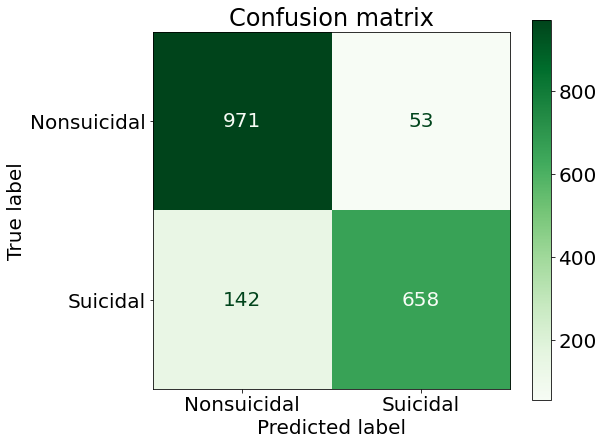

In [67]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
plot_confusion_matrix(logreg, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
# plot_confusion_matrix(logreg, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

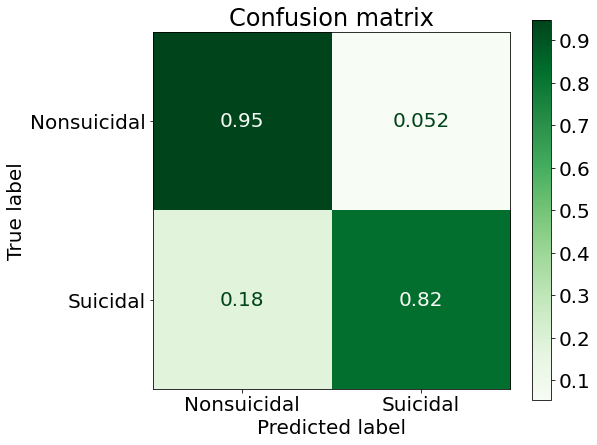

In [68]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
# plot_confusion_matrix(logreg, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
plot_confusion_matrix(logreg, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

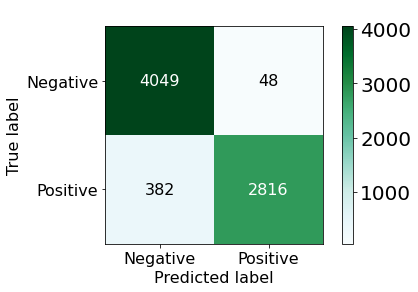

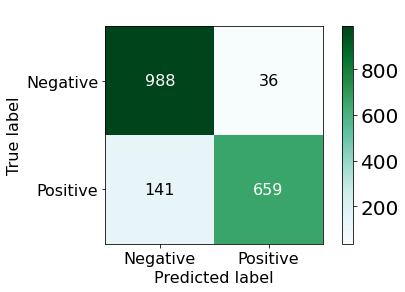

In [69]:
# !pip install scikit-plot
import scikitplot as skplt

p=y_train
q=y_test

y_train = pd.DataFrame(y_train)
y_train=y_train.replace([0,1], ["Negative","Positive"])

pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)
pred_train=pred_train.replace([0,1], ["Negative","Positive"])


pred_test=clf.predict(X_test)
y_score = pred_test
y_test = pd.DataFrame(y_test)
y_test=y_test.replace([0,1], ["Negative","Positive"])
pred_test=pd.DataFrame(pred_test)

pred_test=pred_test.replace([0,1], ["Negative","Positive"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )
y_train=p
y_test=q

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


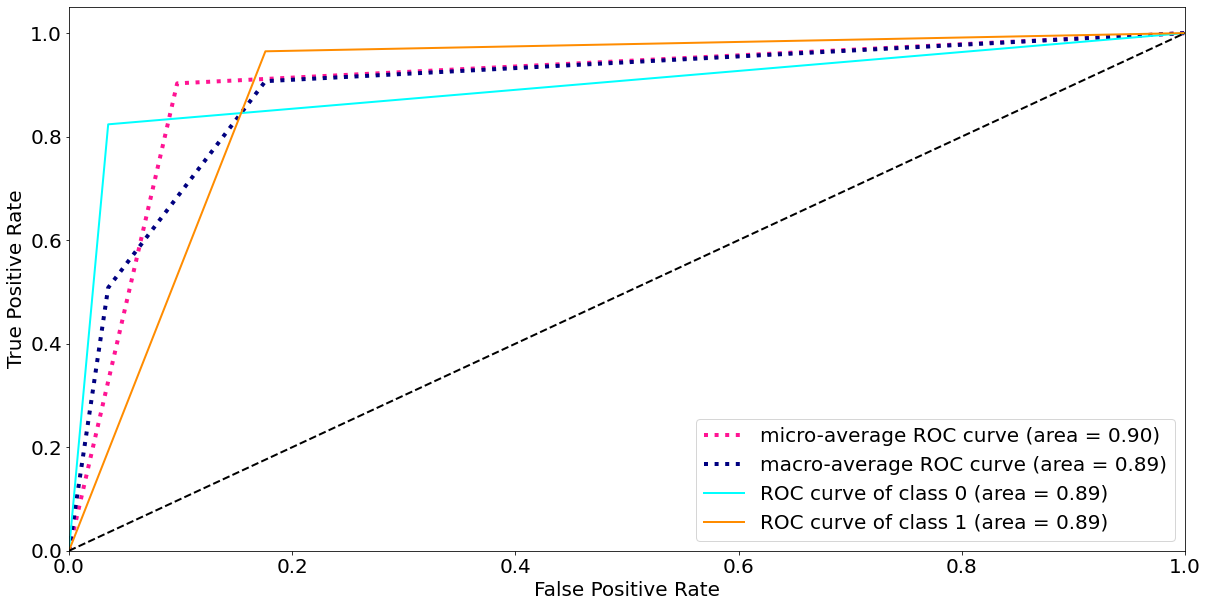

In [70]:
n_classes = 2
roc_y_test = [None] * len(y_test);    
for i in range(0, len(y_test)):    
    roc_y_test[i] = y_test[i]; 
    
y_score[50]=2
roc_y_test[50]=2
y_test
from sklearn.preprocessing import label_binarize
y_score = label_binarize(y_score, classes=[1, 0])
roc_y_test = label_binarize(roc_y_test, classes=[1, 0])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(roc_y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [71]:
acc_train=format(accuracy_score(logreg.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, logreg.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,logreg.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,logreg.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(logreg.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, logreg.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,logreg.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,logreg.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Logistic Regression',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
5,XGBoost Classifier,0.948,0.955,0.942,0.947,0.906,0.912,0.899,0.903
6,Gradient Boosting Classifier,0.941,0.949,0.934,0.939,0.903,0.912,0.894,0.900
4,CatBoost Classifier,0.965,0.970,0.961,0.964,0.901,0.907,0.894,0.898
7,Logistic Regression,0.953,0.958,0.948,0.952,0.893,0.899,0.885,0.890
3,Random Forest Classifier,0.997,0.997,0.997,0.997,0.892,0.892,0.888,0.890
2,Support Vector Machines,0.963,0.967,0.959,0.962,0.885,0.889,0.878,0.882
1,Naive Bayes Classifier,0.898,0.916,0.885,0.893,0.860,0.864,0.852,0.856
0,Decision Tree Classifier,0.885,0.903,0.872,0.880,0.854,0.874,0.839,0.846


# K-Nearest Neighbor(KNN)

In [72]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=10)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [73]:
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round()))
print("Recall:",recall_score(y_test, y_pred.round()))
print("F1 Score:",f1_score(y_test, y_pred.round()))

Accuracy: 0.6546052631578947
Precision: 0.7456647398843931
Recall: 0.3225
F1 Score: 0.450261780104712


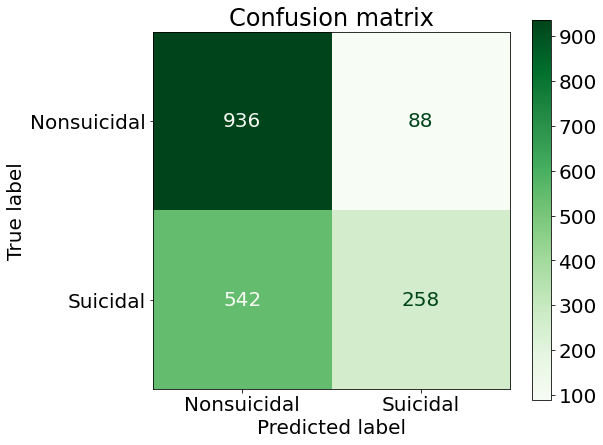

In [74]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
plot_confusion_matrix(knn, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
# plot_confusion_matrix(knn, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

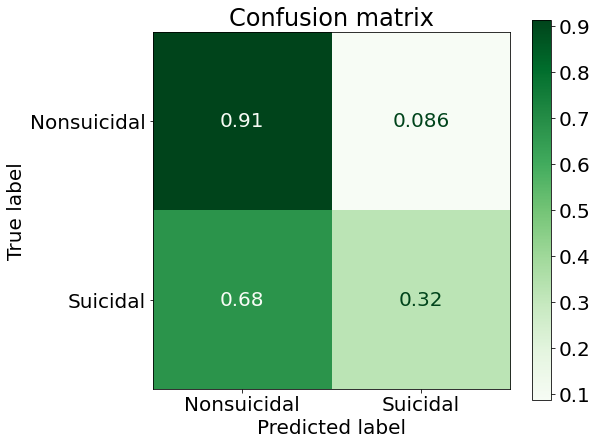

In [75]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
# plot_confusion_matrix(knn, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
plot_confusion_matrix(knn, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

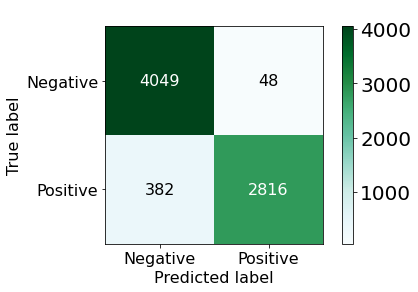

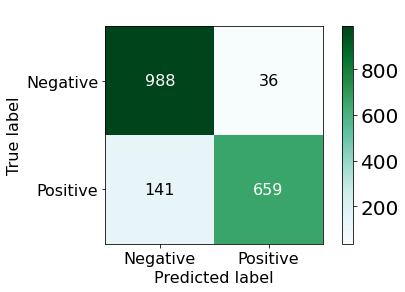

In [76]:
# !pip install scikit-plot
import scikitplot as skplt

p=y_train
q=y_test

y_train = pd.DataFrame(y_train)
y_train=y_train.replace([0,1], ["Negative","Positive"])

pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)
pred_train=pred_train.replace([0,1], ["Negative","Positive"])


pred_test=clf.predict(X_test)
y_score = pred_test
y_test = pd.DataFrame(y_test)
y_test=y_test.replace([0,1], ["Negative","Positive"])
pred_test=pd.DataFrame(pred_test)

pred_test=pred_test.replace([0,1], ["Negative","Positive"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )
y_train=p
y_test=q

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


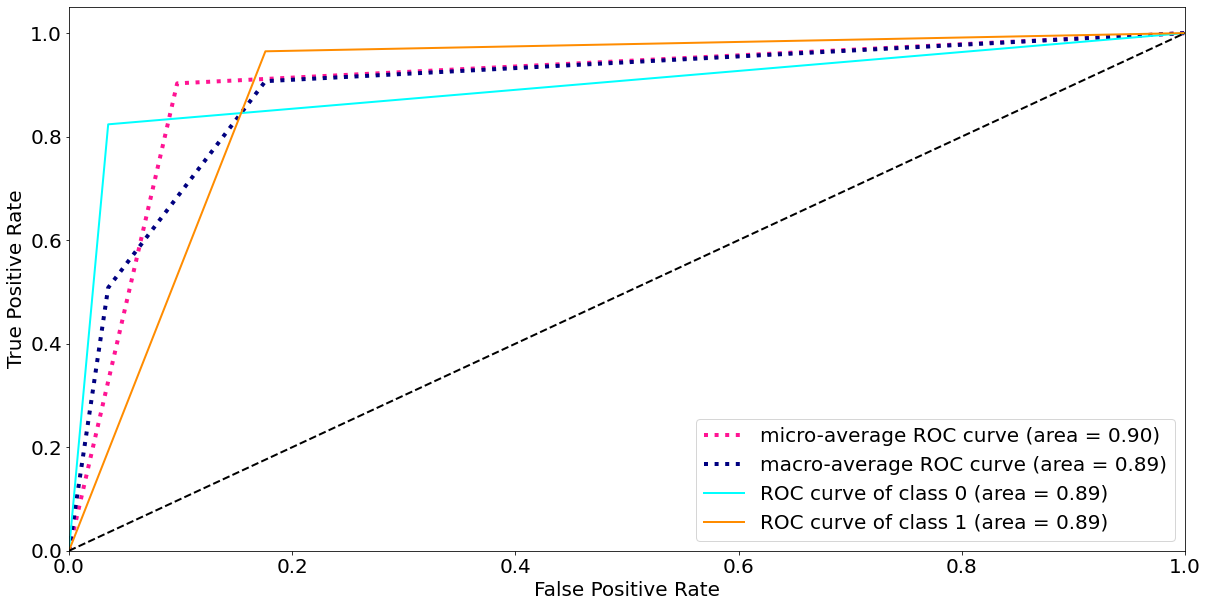

In [77]:
n_classes = 2
roc_y_test = [None] * len(y_test);    
for i in range(0, len(y_test)):    
    roc_y_test[i] = y_test[i]; 
    
y_score[50]=2
roc_y_test[50]=2
y_test
from sklearn.preprocessing import label_binarize
y_score = label_binarize(y_score, classes=[1, 0])
roc_y_test = label_binarize(roc_y_test, classes=[1, 0])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(roc_y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [78]:
acc_train=format(accuracy_score(knn.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, knn.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train, knn.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train, knn.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(knn.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, knn.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test, knn.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test, knn.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['K-Nearest Neighbor(KNN)',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
5,XGBoost Classifier,0.948,0.955,0.942,0.947,0.906,0.912,0.899,0.903
6,Gradient Boosting Classifier,0.941,0.949,0.934,0.939,0.903,0.912,0.894,0.900
4,CatBoost Classifier,0.965,0.970,0.961,0.964,0.901,0.907,0.894,0.898
7,Logistic Regression,0.953,0.958,0.948,0.952,0.893,0.899,0.885,0.890
3,Random Forest Classifier,0.997,0.997,0.997,0.997,0.892,0.892,0.888,0.890
2,Support Vector Machines,0.963,0.967,0.959,0.962,0.885,0.889,0.878,0.882
1,Naive Bayes Classifier,0.898,0.916,0.885,0.893,0.860,0.864,0.852,0.856
0,Decision Tree Classifier,0.885,0.903,0.872,0.880,0.854,0.874,0.839,0.846
8,K-Nearest Neighbor(KNN),0.692,0.737,0.659,0.648,0.655,0.689,0.618,0.599


# AdaBoost Classifier

In [79]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
# abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)
abc =AdaBoostClassifier(n_estimators=50, learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [80]:
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round()))
print("Recall:",recall_score(y_test, y_pred.round()))
print("F1 Score:",f1_score(y_test, y_pred.round()))

Accuracy: 0.8843201754385965
Precision: 0.9165487977369166
Recall: 0.81
F1 Score: 0.8599867285998672


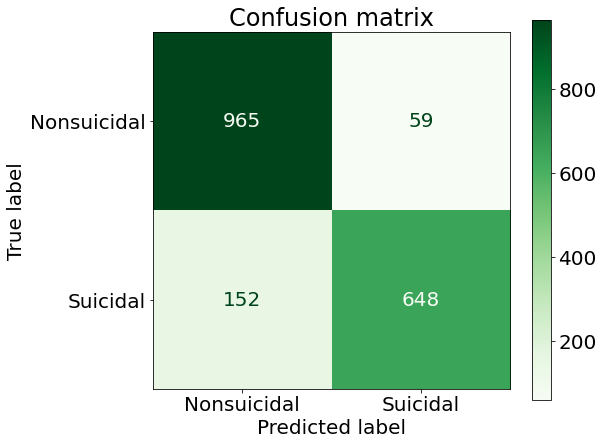

In [81]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
plot_confusion_matrix(model, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
# plot_confusion_matrix(model, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

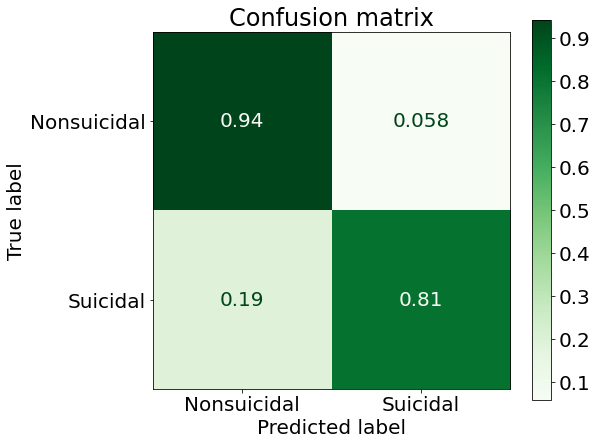

In [82]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
# plot_confusion_matrix(model, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
plot_confusion_matrix(model, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

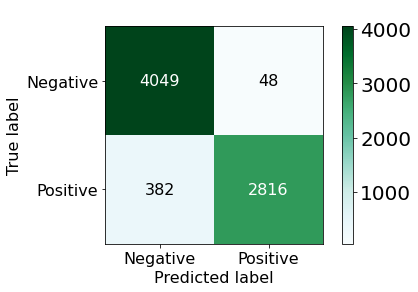

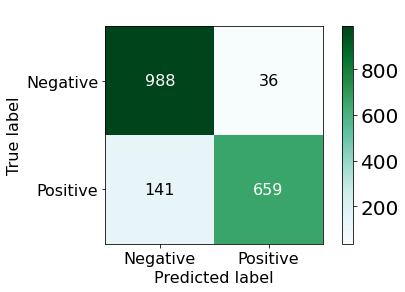

In [83]:
# !pip install scikit-plot
import scikitplot as skplt

p=y_train
q=y_test

y_train = pd.DataFrame(y_train)
y_train=y_train.replace([0,1], ["Negative","Positive"])

pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)
pred_train=pred_train.replace([0,1], ["Negative","Positive"])


pred_test=clf.predict(X_test)
y_score = pred_test
y_test = pd.DataFrame(y_test)
y_test=y_test.replace([0,1], ["Negative","Positive"])
pred_test=pd.DataFrame(pred_test)

pred_test=pred_test.replace([0,1], ["Negative","Positive"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )
y_train=p
y_test=q

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


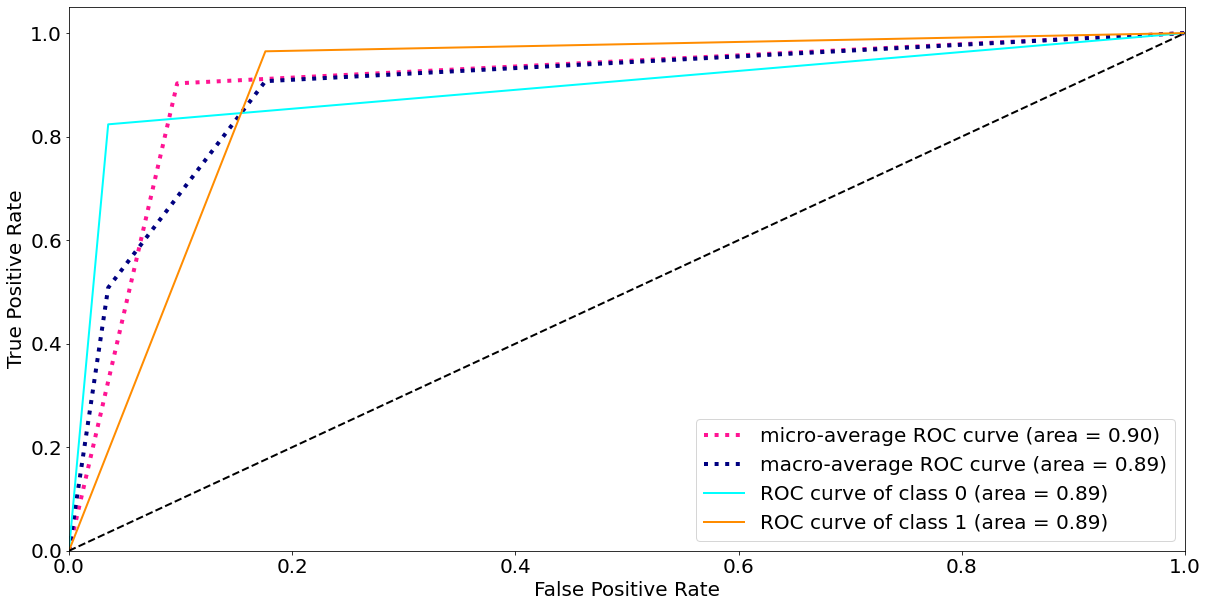

In [84]:
n_classes = 2
roc_y_test = [None] * len(y_test);    
for i in range(0, len(y_test)):    
    roc_y_test[i] = y_test[i]; 
    
y_score[50]=2
roc_y_test[50]=2
y_test
from sklearn.preprocessing import label_binarize
y_score = label_binarize(y_score, classes=[1, 0])
roc_y_test = label_binarize(roc_y_test, classes=[1, 0])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(roc_y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [85]:
acc_train=format(accuracy_score(model.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, model.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,model.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,model.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(model.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, model.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test, model.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,model.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['AdaBoost Classifier',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
5,XGBoost Classifier,0.948,0.955,0.942,0.947,0.906,0.912,0.899,0.903
6,Gradient Boosting Classifier,0.941,0.949,0.934,0.939,0.903,0.912,0.894,0.900
4,CatBoost Classifier,0.965,0.970,0.961,0.964,0.901,0.907,0.894,0.898
7,Logistic Regression,0.953,0.958,0.948,0.952,0.893,0.899,0.885,0.890
3,Random Forest Classifier,0.997,0.997,0.997,0.997,0.892,0.892,0.888,0.890
2,Support Vector Machines,0.963,0.967,0.959,0.962,0.885,0.889,0.878,0.882
9,AdaBoost Classifier,0.903,0.909,0.896,0.900,0.884,0.890,0.876,0.881
1,Naive Bayes Classifier,0.898,0.916,0.885,0.893,0.860,0.864,0.852,0.856
0,Decision Tree Classifier,0.885,0.903,0.872,0.880,0.854,0.874,0.839,0.846
8,K-Nearest Neighbor(KNN),0.692,0.737,0.659,0.648,0.655,0.689,0.618,0.599


# Multi-layer Perceptron (MLP)

In [86]:
from sklearn.neural_network import MLPClassifier
clf =MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(16, 16), random_state=1)

# clf =MLPClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [87]:
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round()))
print("Recall:",recall_score(y_test, y_pred.round()))
print("F1 Score:",f1_score(y_test, y_pred.round()))

Accuracy: 0.8985745614035088
Precision: 0.8773006134969326
Recall: 0.89375
F1 Score: 0.8854489164086687


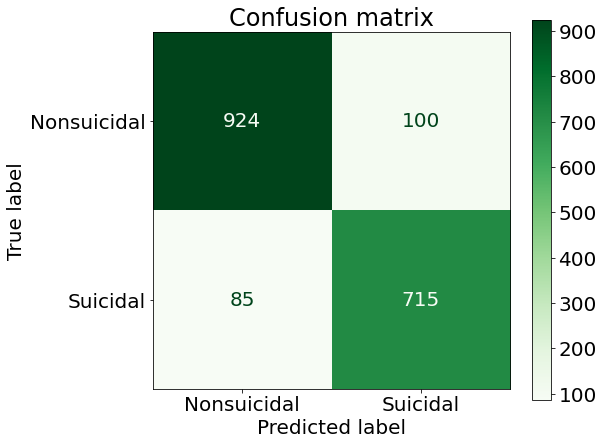

In [88]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
# plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

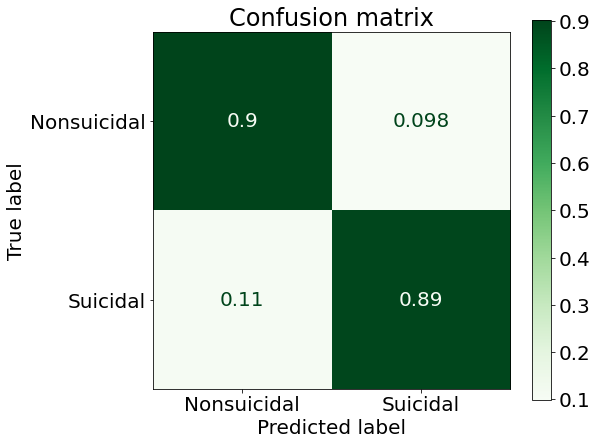

In [89]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
# plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

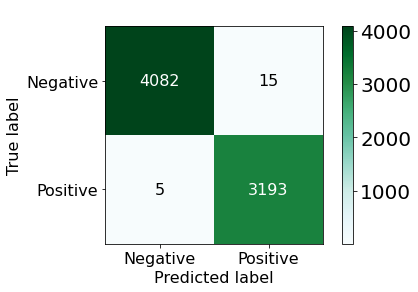

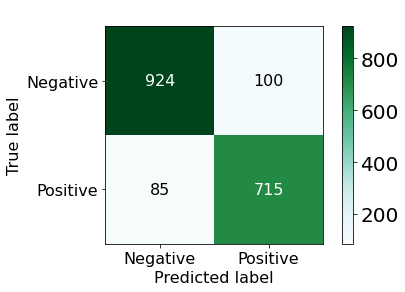

In [90]:
# !pip install scikit-plot
import scikitplot as skplt

p=y_train
q=y_test

y_train = pd.DataFrame(y_train)
y_train=y_train.replace([0,1], ["Negative","Positive"])

pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)
pred_train=pred_train.replace([0,1], ["Negative","Positive"])


pred_test=clf.predict(X_test)
y_score = pred_test
y_test = pd.DataFrame(y_test)
y_test=y_test.replace([0,1], ["Negative","Positive"])
pred_test=pd.DataFrame(pred_test)

pred_test=pred_test.replace([0,1], ["Negative","Positive"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )
y_train=p
y_test=q

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


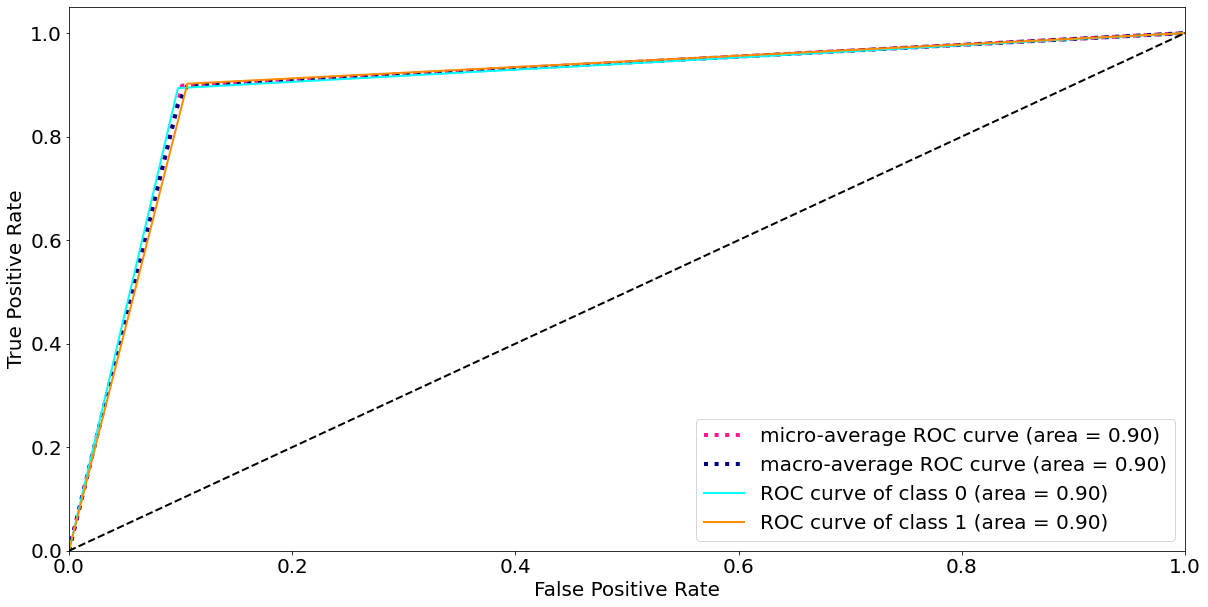

In [91]:
n_classes = 2
roc_y_test = [None] * len(y_test);    
for i in range(0, len(y_test)):    
    roc_y_test[i] = y_test[i]; 
    
y_score[50]=2
roc_y_test[50]=2
y_test
from sklearn.preprocessing import label_binarize
y_score = label_binarize(y_score, classes=[1, 0])
roc_y_test = label_binarize(roc_y_test, classes=[1, 0])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(roc_y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [92]:
acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Multi-layer Perceptron(MLP)',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
5,XGBoost Classifier,0.948,0.955,0.942,0.947,0.906,0.912,0.899,0.903
6,Gradient Boosting Classifier,0.941,0.949,0.934,0.939,0.903,0.912,0.894,0.900
4,CatBoost Classifier,0.965,0.970,0.961,0.964,0.901,0.907,0.894,0.898
10,Multi-layer Perceptron(MLP),0.997,0.997,0.997,0.997,0.899,0.897,0.898,0.897
7,Logistic Regression,0.953,0.958,0.948,0.952,0.893,0.899,0.885,0.890
3,Random Forest Classifier,0.997,0.997,0.997,0.997,0.892,0.892,0.888,0.890
2,Support Vector Machines,0.963,0.967,0.959,0.962,0.885,0.889,0.878,0.882
9,AdaBoost Classifier,0.903,0.909,0.896,0.900,0.884,0.890,0.876,0.881
1,Naive Bayes Classifier,0.898,0.916,0.885,0.893,0.860,0.864,0.852,0.856
0,Decision Tree Classifier,0.885,0.903,0.872,0.880,0.854,0.874,0.839,0.846


# Bagging Classifier

In [93]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [94]:
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round()))
print("Recall:",recall_score(y_test, y_pred.round()))
print("F1 Score:",f1_score(y_test, y_pred.round()))

Accuracy: 0.8952850877192983
Precision: 0.9691833590138675
Recall: 0.78625
F1 Score: 0.8681849551414769


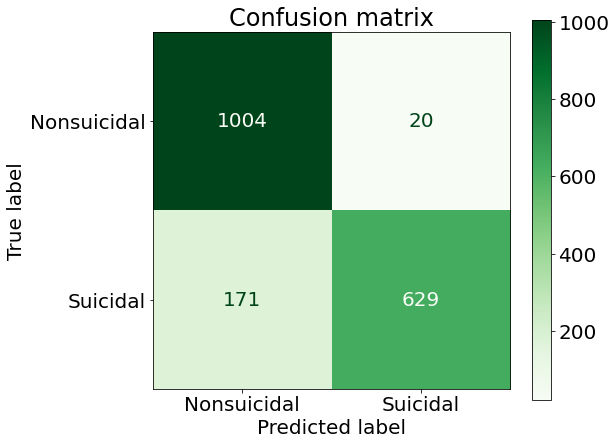

In [95]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
# plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

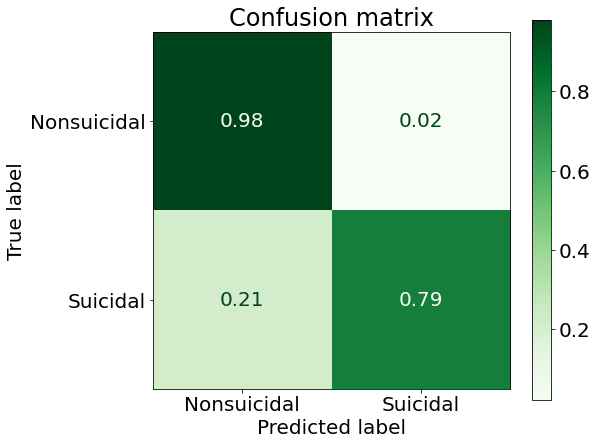

In [96]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
# plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

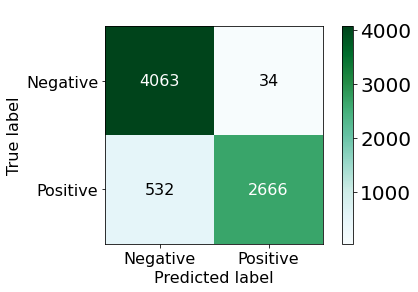

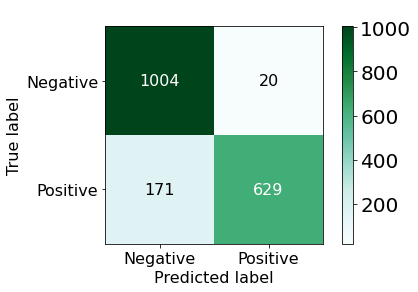

In [97]:
# !pip install scikit-plot
import scikitplot as skplt

p=y_train
q=y_test

y_train = pd.DataFrame(y_train)
y_train=y_train.replace([0,1], ["Negative","Positive"])

pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)
pred_train=pred_train.replace([0,1], ["Negative","Positive"])


pred_test=clf.predict(X_test)
y_score = pred_test
y_test = pd.DataFrame(y_test)
y_test=y_test.replace([0,1], ["Negative","Positive"])
pred_test=pd.DataFrame(pred_test)

pred_test=pred_test.replace([0,1], ["Negative","Positive"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )
y_train=p
y_test=q

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


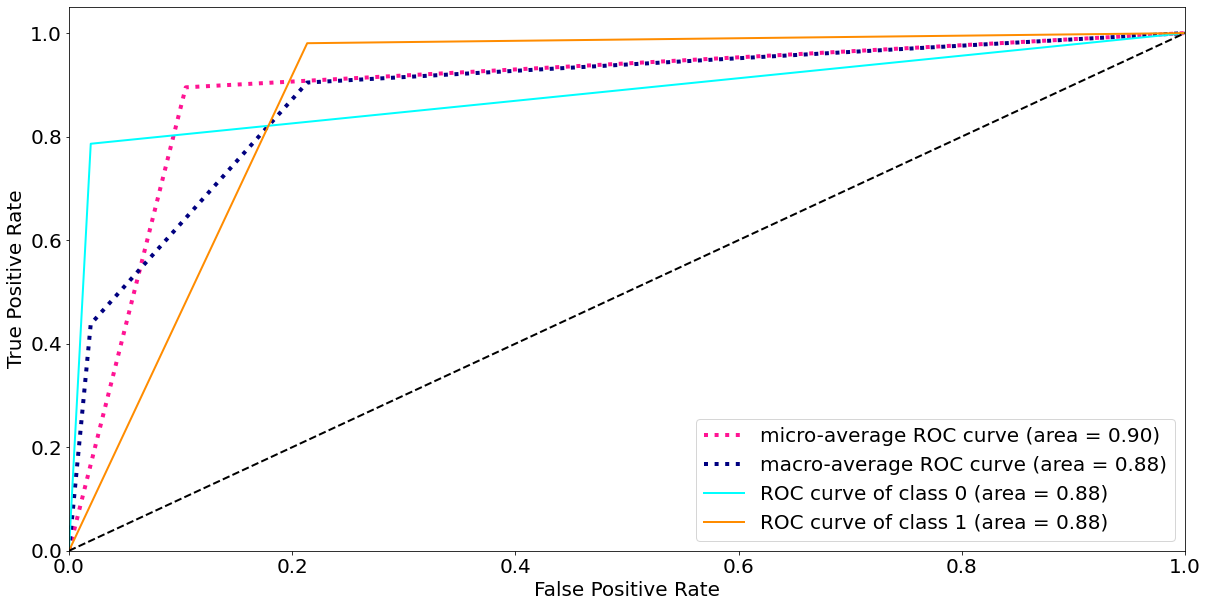

In [98]:
n_classes = 2
roc_y_test = [None] * len(y_test);    
for i in range(0, len(y_test)):    
    roc_y_test[i] = y_test[i]; 
    
y_score[50]=2
roc_y_test[50]=2
y_test
from sklearn.preprocessing import label_binarize
y_score = label_binarize(y_score, classes=[1, 0])
roc_y_test = label_binarize(roc_y_test, classes=[1, 0])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(roc_y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [99]:
acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Bagging Classifier',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
5,XGBoost Classifier,0.948,0.955,0.942,0.947,0.906,0.912,0.899,0.903
6,Gradient Boosting Classifier,0.941,0.949,0.934,0.939,0.903,0.912,0.894,0.900
4,CatBoost Classifier,0.965,0.970,0.961,0.964,0.901,0.907,0.894,0.898
10,Multi-layer Perceptron(MLP),0.997,0.997,0.997,0.997,0.899,0.897,0.898,0.897
11,Bagging Classifier,0.922,0.936,0.913,0.919,0.895,0.912,0.883,0.891
7,Logistic Regression,0.953,0.958,0.948,0.952,0.893,0.899,0.885,0.890
3,Random Forest Classifier,0.997,0.997,0.997,0.997,0.892,0.892,0.888,0.890
2,Support Vector Machines,0.963,0.967,0.959,0.962,0.885,0.889,0.878,0.882
9,AdaBoost Classifier,0.903,0.909,0.896,0.900,0.884,0.890,0.876,0.881
1,Naive Bayes Classifier,0.898,0.916,0.885,0.893,0.860,0.864,0.852,0.856


# Weighted Average Probabilities(Soft Voting)

In [100]:
from sklearn.ensemble import VotingClassifier

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)
eclf = eclf.fit(X_train, y_train)

y_pred = eclf.predict(X_test)

In [101]:
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round()))
print("Recall:",recall_score(y_test, y_pred.round()))
print("F1 Score:",f1_score(y_test, y_pred.round()))

Accuracy: 0.8777412280701754
Precision: 0.960127591706539
Recall: 0.7525
F1 Score: 0.8437281009110021


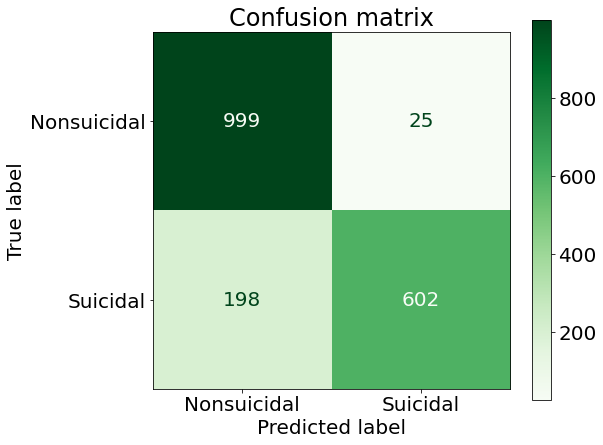

In [102]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
plot_confusion_matrix(eclf, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
# plot_confusion_matrix(eclf, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

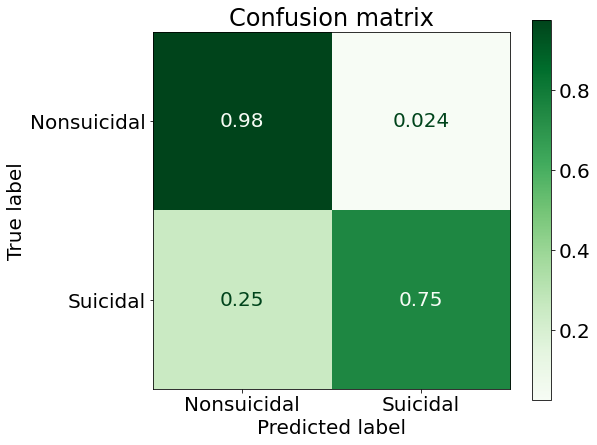

In [103]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
# plot_confusion_matrix(eclf, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
plot_confusion_matrix(eclf, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

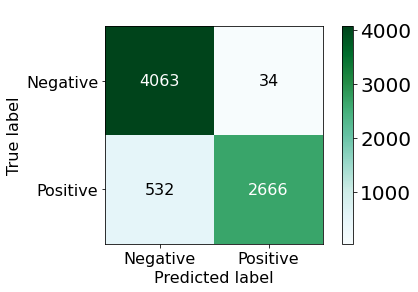

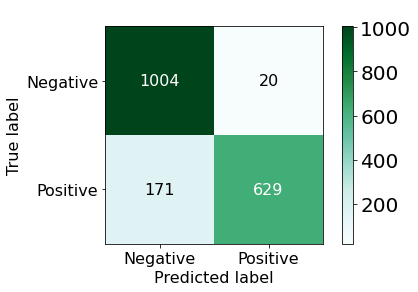

In [104]:
# !pip install scikit-plot
import scikitplot as skplt

p=y_train
q=y_test

y_train = pd.DataFrame(y_train)
y_train=y_train.replace([0,1], ["Negative","Positive"])

pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)
pred_train=pred_train.replace([0,1], ["Negative","Positive"])


pred_test=clf.predict(X_test)
y_score = pred_test
y_test = pd.DataFrame(y_test)
y_test=y_test.replace([0,1], ["Negative","Positive"])
pred_test=pd.DataFrame(pred_test)

pred_test=pred_test.replace([0,1], ["Negative","Positive"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )
y_train=p
y_test=q

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


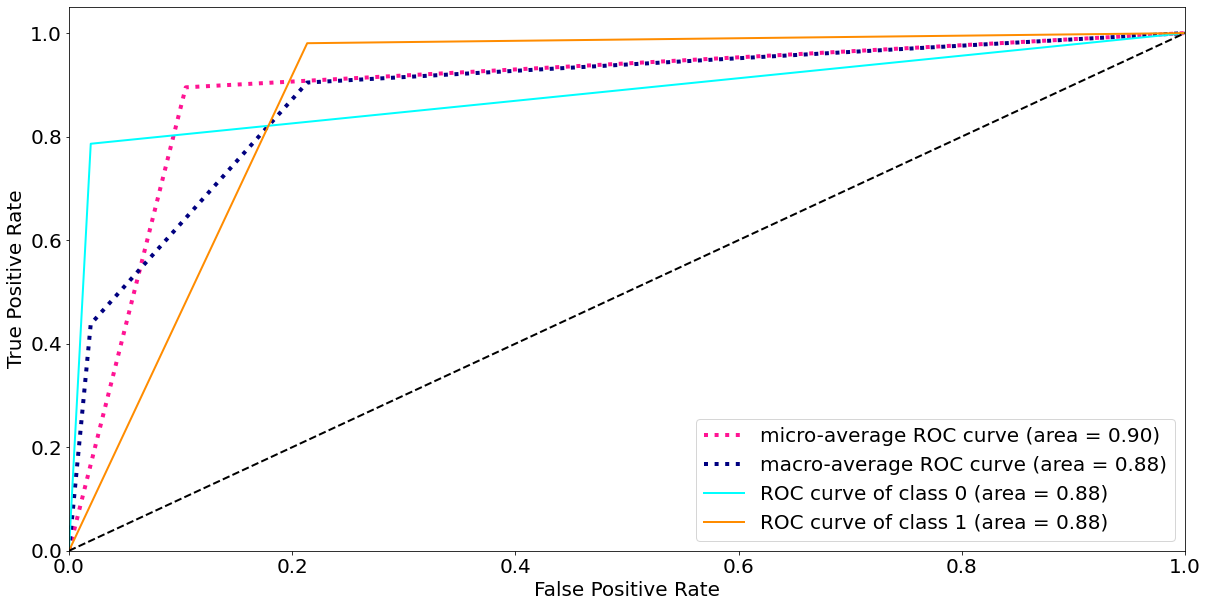

In [105]:
n_classes = 2
roc_y_test = [None] * len(y_test);    
for i in range(0, len(y_test)):    
    roc_y_test[i] = y_test[i]; 
    
y_score[50]=2
roc_y_test[50]=2
y_test
from sklearn.preprocessing import label_binarize
y_score = label_binarize(y_score, classes=[1, 0])
roc_y_test = label_binarize(roc_y_test, classes=[1, 0])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(roc_y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [106]:
acc_train=format(accuracy_score(eclf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, eclf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train, eclf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train, eclf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(eclf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, eclf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test, eclf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test, eclf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Soft Voting',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
5,XGBoost Classifier,0.948,0.955,0.942,0.947,0.906,0.912,0.899,0.903
6,Gradient Boosting Classifier,0.941,0.949,0.934,0.939,0.903,0.912,0.894,0.900
4,CatBoost Classifier,0.965,0.970,0.961,0.964,0.901,0.907,0.894,0.898
10,Multi-layer Perceptron(MLP),0.997,0.997,0.997,0.997,0.899,0.897,0.898,0.897
11,Bagging Classifier,0.922,0.936,0.913,0.919,0.895,0.912,0.883,0.891
7,Logistic Regression,0.953,0.958,0.948,0.952,0.893,0.899,0.885,0.890
3,Random Forest Classifier,0.997,0.997,0.997,0.997,0.892,0.892,0.888,0.890
2,Support Vector Machines,0.963,0.967,0.959,0.962,0.885,0.889,0.878,0.882
9,AdaBoost Classifier,0.903,0.909,0.896,0.900,0.884,0.890,0.876,0.881
12,Soft Voting,0.907,0.922,0.896,0.903,0.878,0.897,0.864,0.872


# Voting Classifier

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

LogReg_clf = LogisticRegression()
DTree_clf = DecisionTreeClassifier()
SVC_clf = SVC()

LogReg_clf.fit(X_train, y_train)
DTree_clf.fit(X_train, y_train)
SVC_clf.fit(X_train, y_train)
clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf)], voting='hard')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round()))
print("Recall:",recall_score(y_test, y_pred.round()))
print("F1 Score:",f1_score(y_test, y_pred.round()))

Accuracy: 0.9029605263157895
Precision: 0.9507959479015919
Recall: 0.82125
F1 Score: 0.8812877263581489


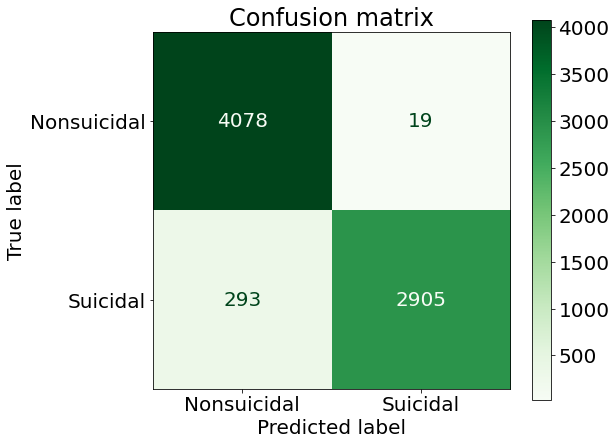

In [109]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
plot_confusion_matrix(clf, X_train, y_train,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
# plot_confusion _matrix(clf, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

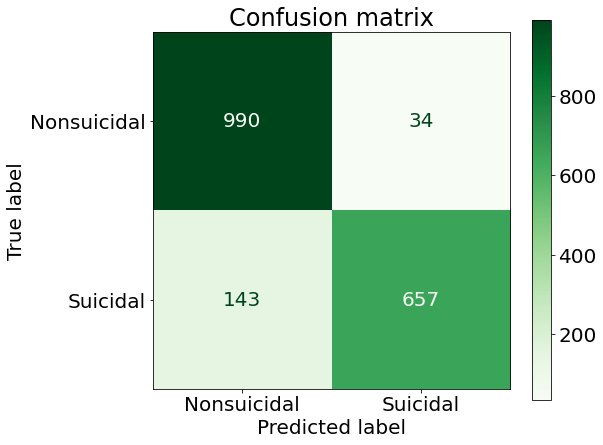

In [110]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
# plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

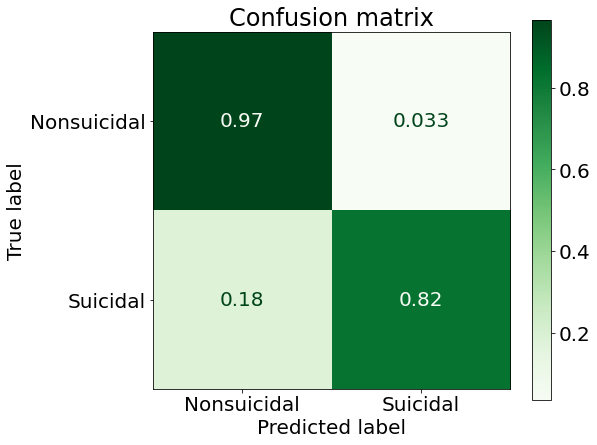

In [111]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.rcParams.update({'font.size': 20})
# plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, cmap=plt.cm.Greens, ax=ax)
plot_confusion_matrix(clf, X_test, y_test,display_labels=labels, normalize='true' , cmap=plt.cm.Greens, ax=ax)
plt.title('Confusion matrix')
plt.show()

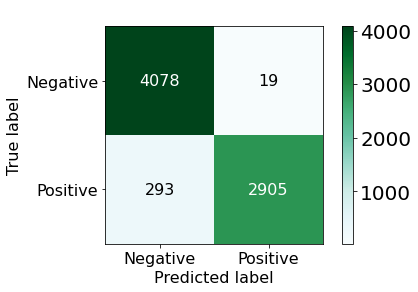

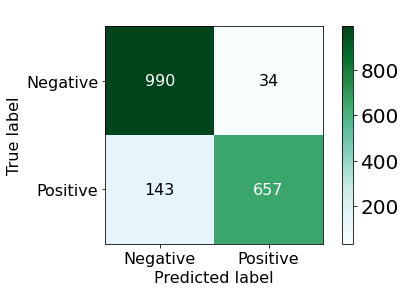

In [112]:
# !pip install scikit-plot
import scikitplot as skplt

p=y_train
q=y_test

y_train = pd.DataFrame(y_train)
y_train=y_train.replace([0,1], ["Negative","Positive"])

pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)
pred_train=pred_train.replace([0,1], ["Negative","Positive"])


pred_test=clf.predict(X_test)
y_score = pred_test
y_test = pd.DataFrame(y_test)
y_test=y_test.replace([0,1], ["Negative","Positive"])
pred_test=pd.DataFrame(pred_test)

pred_test=pred_test.replace([0,1], ["Negative","Positive"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )
y_train=p
y_test=q

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


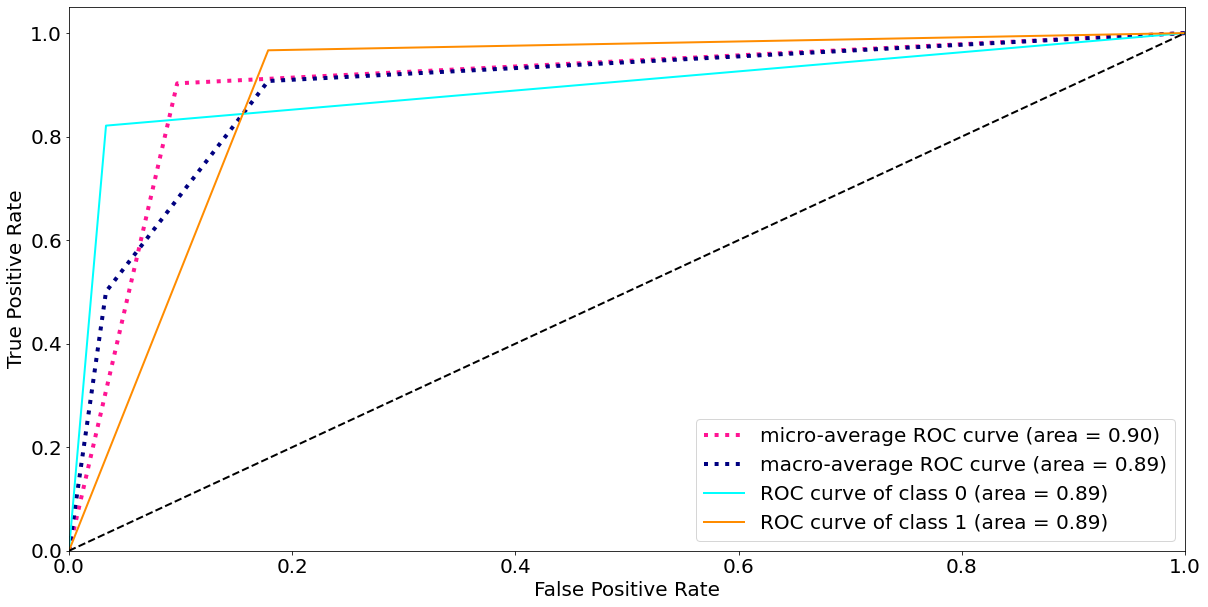

In [113]:
n_classes = 2
roc_y_test = [None] * len(y_test);    
for i in range(0, len(y_test)):    
    roc_y_test[i] = y_test[i]; 
    
y_score[50]=2
roc_y_test[50]=2
y_test
from sklearn.preprocessing import label_binarize
y_score = label_binarize(y_score, classes=[1, 0])
roc_y_test = label_binarize(roc_y_test, classes=[1, 0])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(roc_y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [114]:
acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Voting Classifier',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
5,XGBoost Classifier,0.948,0.955,0.942,0.947,0.906,0.912,0.899,0.903
6,Gradient Boosting Classifier,0.941,0.949,0.934,0.939,0.903,0.912,0.894,0.900
13,Voting Classifier,0.957,0.963,0.952,0.956,0.903,0.912,0.894,0.900
4,CatBoost Classifier,0.965,0.970,0.961,0.964,0.901,0.907,0.894,0.898
10,Multi-layer Perceptron(MLP),0.997,0.997,0.997,0.997,0.899,0.897,0.898,0.897
11,Bagging Classifier,0.922,0.936,0.913,0.919,0.895,0.912,0.883,0.891
7,Logistic Regression,0.953,0.958,0.948,0.952,0.893,0.899,0.885,0.890
3,Random Forest Classifier,0.997,0.997,0.997,0.997,0.892,0.892,0.888,0.890
2,Support Vector Machines,0.963,0.967,0.959,0.962,0.885,0.889,0.878,0.882
9,AdaBoost Classifier,0.903,0.909,0.896,0.900,0.884,0.890,0.876,0.881


# Final Evaluation Table

In [115]:
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
5,XGBoost Classifier,0.948,0.955,0.942,0.947,0.906,0.912,0.899,0.903
6,Gradient Boosting Classifier,0.941,0.949,0.934,0.939,0.903,0.912,0.894,0.900
13,Voting Classifier,0.957,0.963,0.952,0.956,0.903,0.912,0.894,0.900
4,CatBoost Classifier,0.965,0.970,0.961,0.964,0.901,0.907,0.894,0.898
10,Multi-layer Perceptron(MLP),0.997,0.997,0.997,0.997,0.899,0.897,0.898,0.897
11,Bagging Classifier,0.922,0.936,0.913,0.919,0.895,0.912,0.883,0.891
7,Logistic Regression,0.953,0.958,0.948,0.952,0.893,0.899,0.885,0.890
3,Random Forest Classifier,0.997,0.997,0.997,0.997,0.892,0.892,0.888,0.890
2,Support Vector Machines,0.963,0.967,0.959,0.962,0.885,0.889,0.878,0.882
9,AdaBoost Classifier,0.903,0.909,0.896,0.900,0.884,0.890,0.876,0.881
